In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [16]:
# Read Data Set
df = pd.read_csv("C:\\Users\\Tannu\\OneDrive\\Desktop\\excelr project\\Myocardial infarction complications.csv")
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
df.columns

Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=124)

In [18]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [19]:
df.shape

(1700, 124)

In [20]:
# Total Missing Values
df.isnull().sum().sum()

15974

In [21]:
#printing only 70 columns with highest percentage of Null values
display(round((df.isnull().sum() / (len(df.index)) * 100) , 2).sort_values(ascending = False).head(70).to_frame().rename({0:'%age'}, axis = 1).T.style.background_gradient('magma_r'))
print()
missing = (df.isnull().sum() / (len(df.index)) * 100).to_frame().reset_index().rename({0:'%age'}, axis = 1)

,KFK_BLOOD,IBS_NASL,S_AD_KBRIG,D_AD_KBRIG,NOT_NA_KB,LID_KB,NA_KB,GIPER_NA,NA_BLOOD,K_BLOOD,GIPO_K,AST_BLOOD,ALT_BLOOD,S_AD_ORIT,D_AD_ORIT,DLIT_AG,ROE,ritm_ecg_p_06,ritm_ecg_p_08,ritm_ecg_p_01,ritm_ecg_p_07,ritm_ecg_p_02,ritm_ecg_p_04,NA_R_3_n,NOT_NA_3_n,R_AB_3_n,TIME_B_S,L_BLOOD,n_r_ecg_p_06,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_05,n_r_ecg_p_09,n_r_ecg_p_08,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,n_p_ecg_p_09,n_r_ecg_p_04,NOT_NA_2_n,R_AB_2_n,NA_R_2_n,STENOK_AN,ant_im,inf_im,lat_im,FK_STENOK,post_im,ZSN_A,IBS_POST,nr_03,nr_08,nr_07,nr_04,nr_01,nr_02,nr_11,np_07,np_09,np_08,np_01
%age,99.760000,95.760000,63.290000,63.290000,40.350000,39.820000,38.650000,22.060000,22.060000,21.820000,21.710000,16.760000,16.710000,15.710000,15.710000,14.590000,11.940000,8.940000,8.940000,8.940000,8.940000,8.940000,8.940000,7.710000,7.710000,7.530000,7.410000,7.350000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.470000,6.350000,6.350000,6.240000,4.880000,4.710000,4.710000,4.290000,4.240000,3.180000,3.000000,1.240000,1.240000,1.240000,1.240000,1.240000,1.240000,1.240000,1.060000,1.060000,1.060000,1.060000


In [22]:
missing

,index,%age
0,ID,0.000000
1,AGE,0.470588
2,SEX,0.000000
3,INF_ANAM,0.235294
4,STENOK_AN,6.235294
...,...,...
119,DRESSLER,0.000000
120,ZSN,0.000000
121,REC_IM,0.000000
122,P_IM_STEN,0.000000


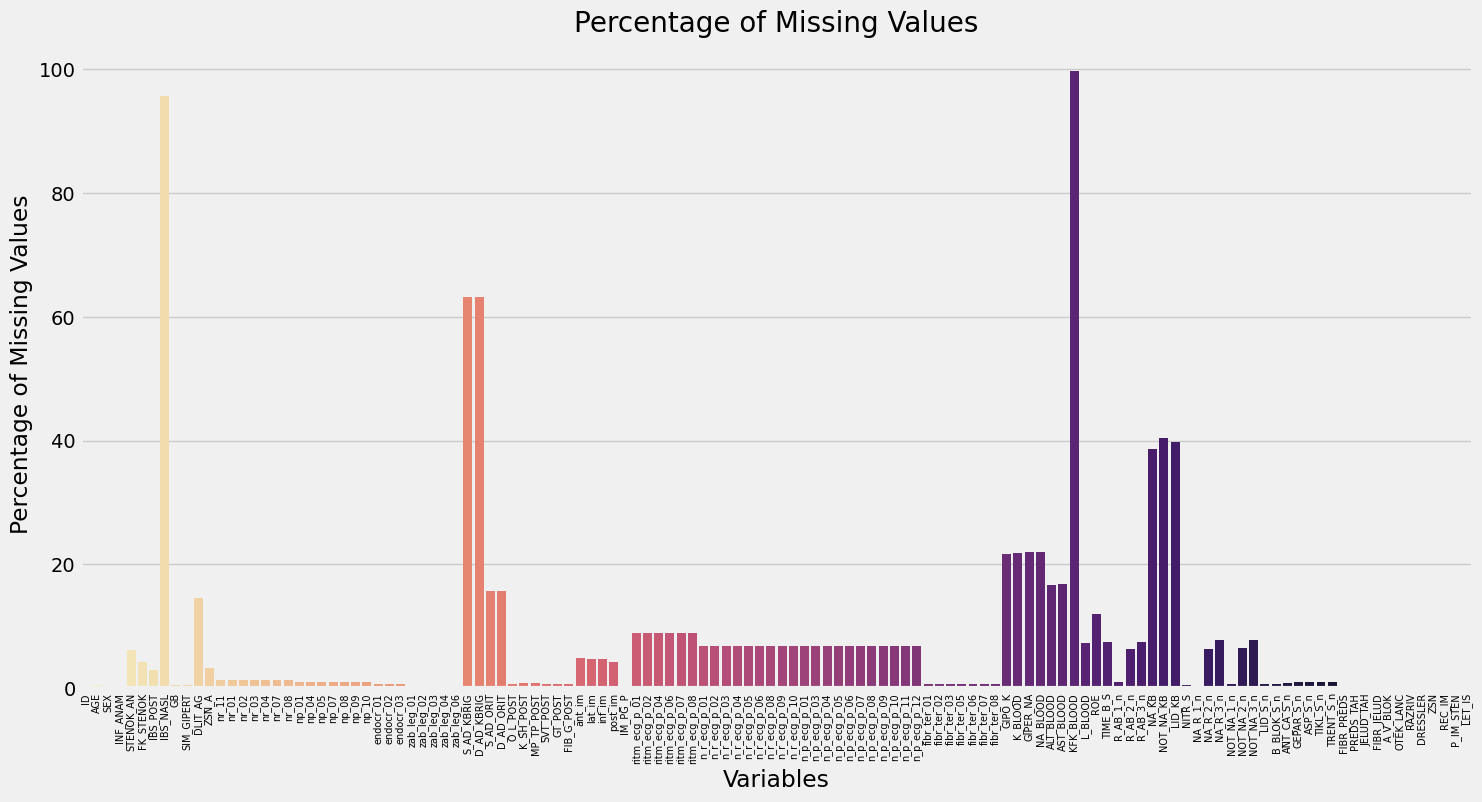

In [23]:
#plotting the % of missing values
ax = sns.barplot(missing['index'],missing['%age'], palette  = 'magma_r')
plt.title("Percentage of Missing Values", fontsize = 20)
plt.xticks(fontsize =7, rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show();

In [24]:
std=df.std()
std

ID           490.892045
AGE           11.259936
SEX            0.483883
INF_ANAM       0.836801
STENOK_AN      2.440586
                ...    
DRESSLER       0.205417
ZSN            0.422084
REC_IM         0.291259
P_IM_STEN      0.282004
LET_IS         1.381818
Length: 124, dtype: float64

In [25]:
df1 = df.fillna(std)
df1

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.000000,1.000000,2.0000,0.48752,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.000000,0.000000,0.0000,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.000000,0.000000,2.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.000000,0.000000,2.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.000000,0.000000,2.0000,0.48752,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.000000,2.000000,2.0000,0.48752,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# Checking the final dataset for missing values again.
df1.isnull().sum().sort_values(ascending = False).to_frame().reset_index().rename({0:'Count'}, axis =1).head(70).T.style.background_gradient('magma_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
index,ID,fibr_ter_05,TIME_B_S,ROE,L_BLOOD,KFK_BLOOD,AST_BLOOD,ALT_BLOOD,NA_BLOOD,GIPER_NA,K_BLOOD,GIPO_K,fibr_ter_08,fibr_ter_07,fibr_ter_06,fibr_ter_03,AGE,fibr_ter_02,fibr_ter_01,n_p_ecg_p_12,n_p_ecg_p_11,n_p_ecg_p_10,n_p_ecg_p_09,n_p_ecg_p_08,n_p_ecg_p_07,n_p_ecg_p_06,n_p_ecg_p_05,n_p_ecg_p_04,n_p_ecg_p_03,n_p_ecg_p_01,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,P_IM_STEN,REC_IM,ZSN,DRESSLER,RAZRIV,OTEK_LANC,A_V_BLOK,FIBR_JELUD,JELUD_TAH,PREDS_TAH,FIBR_PREDS,TRENT_S_n,TIKL_S_n,ASP_S_n,GEPAR_S_n,ANT_CA_S_n,B_BLOK_S_n,LID_S_n,NOT_NA_3_n,NOT_NA_2_n,NOT_NA_1_n,NA_R_3_n,NA_R_2_n,NA_R_1_n,NITR_S,LID_KB,NOT_NA_KB,n_r_ecg_p_10,n_r_ecg_p_09,n_r_ecg_p_08,zab_leg_02,endocr_03,endocr_02,endocr_01,np_10,np_09
Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df1.isnull().sum()

ID           0
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 124, dtype: int64

In [28]:
df1

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.000000,1.000000,2.0000,0.48752,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.000000,0.000000,0.0000,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.000000,0.000000,2.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.000000,0.000000,2.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.000000,0.000000,2.0000,0.48752,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.000000,2.000000,2.0000,0.48752,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.000000,2.000000,1.0000,0.48752,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
df1.describe().style.background_gradient(cmap='bone_r')

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.618870,0.626471,0.555498,2.323942,1.198223,1.149924,0.482755,1.391647,0.034379,3.304979,0.209159,0.026636,0.002955,0.012483,0.022354,0.018669,0.000890,0.002955,0.001541,0.002212,0.007324,0.000846,0.004161,0.001541,0.002212,0.136329,0.025622,0.008161,0.079936,0.072238,0.022367,0.005594,0.013408,72.404512,42.373923,118.373541,72.630426,0.066449,0.028497,0.069127,0.005191,0.005191,0.009486,1.577701,0.862741,1.033173,0.277834,0.029511,0.647518,0.077349,0.024350,0.002861,0.245173,0.042246,0.046823,0.009501,0.142660,0.054396,0.055080,0.028341,0.005748,0.003579,0.003579,0.003579,0.028341,0.006736,0.003579,0.024639,0.076605,0.008605,0.011240,0.029804,0.025385,0.060520,0.008161,0.009982,0.041156,0.002639,0.005722,0.003879,0.001379,0.420547,3.441272,0.050474,107.865909,0.465719,0.253337,1.097573,8.387153,13.188325,4.549854,0.318906,0.158723,0.095379,0.553519,0.598855,0.427011,0.116397,0.485822,0.110865,0.075311,0.333696,0.131733,0.105599,0.284416,0.128628,0.665370,0.712164,0.740837,0.018892,0.204372,0.100000,0.011765,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.755291,0.483883,0.835927,2.363418,1.018754,0.791658,0.102206,1.086141,0.180333,2.864848,0.653267,0.155924,0.048734,0.105667,0.142663,0.130116,0.024396,0.048734,0.

In [30]:
df1.corr()[['LET_IS']].T.style.background_gradient('copper_r')

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
LET_IS,0.504013,0.157769,-0.086326,0.071941,0.110424,0.062364,0.053674,0.010012,0.073777,0.019960,0.082349,0.205889,-0.029051,0.018270,0.049469,0.033319,0.145696,0.009133,0.009529,0.040380,0.010738,0.024363,0.006752,0.016078,0.003296,0.051125,0.077003,0.047279,-0.016319,-0.054357,0.123383,0.098454,-0.006336,-0.028618,-0.009680,-0.004200,0.047446,0.057588,0.105154,0.085093,0.126933,0.062009,-0.018632,0.057156,0.124550,0.079179,0.033952,0.024823,0.091306,-0.138189,0.104883,0.017965,-0.029262,0.076734,-0.021317,-0.001071,0.006024,-0.032064,0.048239,0.099393,0.086892,0.030231,-0.024701,-0.024701,-0.025557,0.015641,-0.017021,-0.013508,0.036120,0.005778,0.054810,-0.012855,0.032740,-0.008778,0.123282,-0.011917,0.022433,-0.012982,-0.017907,-0.014605,-0.014518,-0.000612,-0.009492,-0.029680,0.016141,-0.039273,-0.006102,0.010230,-0.011566,0.075346,0.081617,-0.109348,0.082024,0.117344,0.179535,-0.035773,-0.073058,-0.080990,0.166323,0.102309,0.096918,0.128211,0.065928,0.124803,0.147465,0.027178,-0.067827,-0.047789,0.021046,-0.089077,-0.002554,-0.005463,0.062312,0.037355,0.035562,0.172688,0.056317,0.013378,0.330800,-0.053456,-0.038309,0.098199,-0.096070,1.000000


In [31]:
df1.drop('ID', axis=1, inplace=True)

# Independent Variable : Ordinal


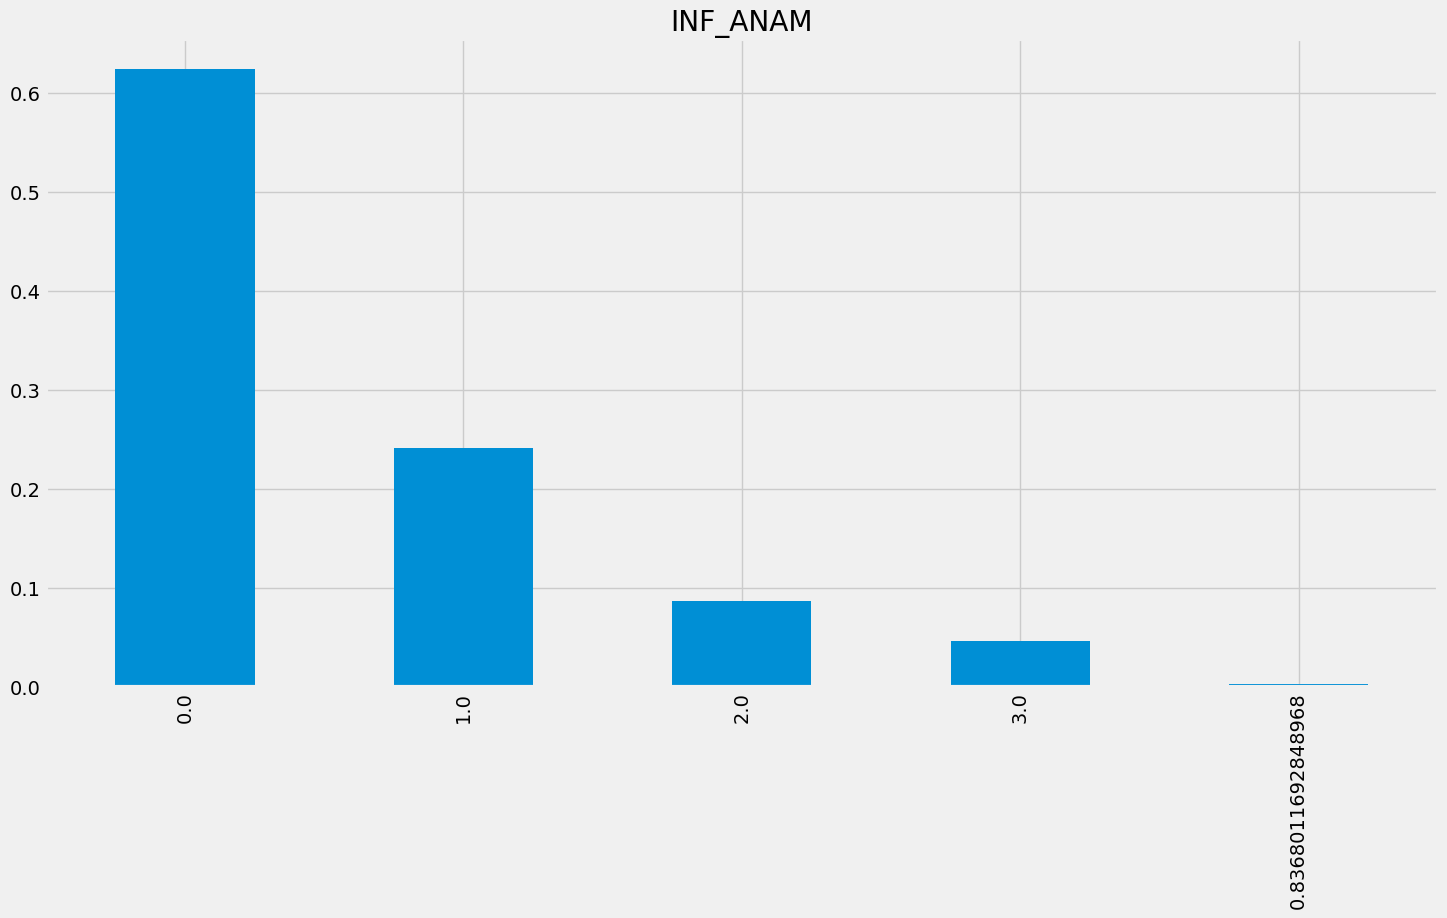

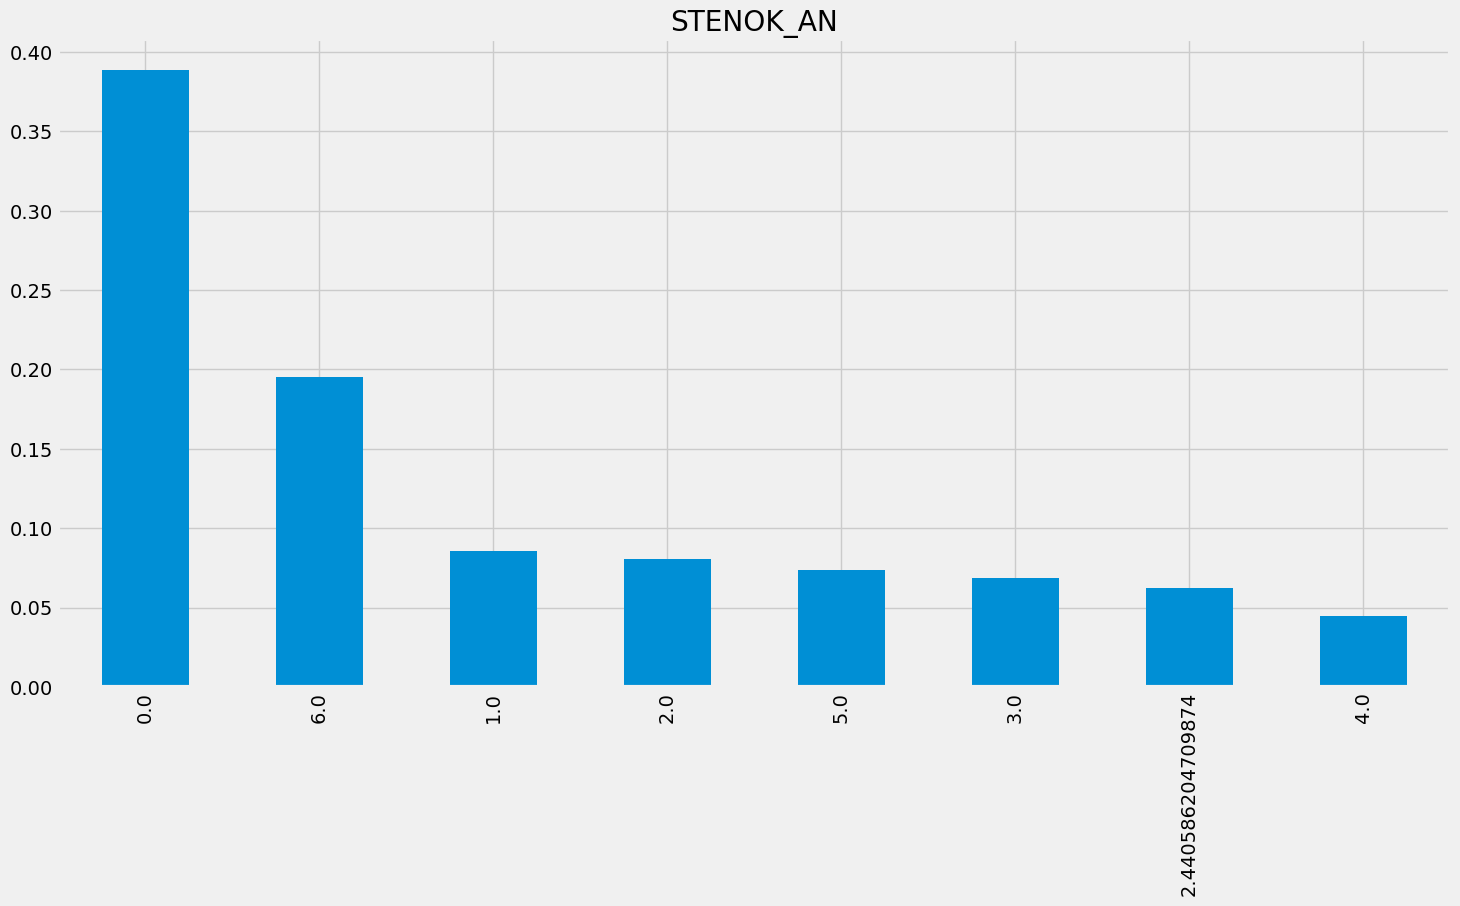

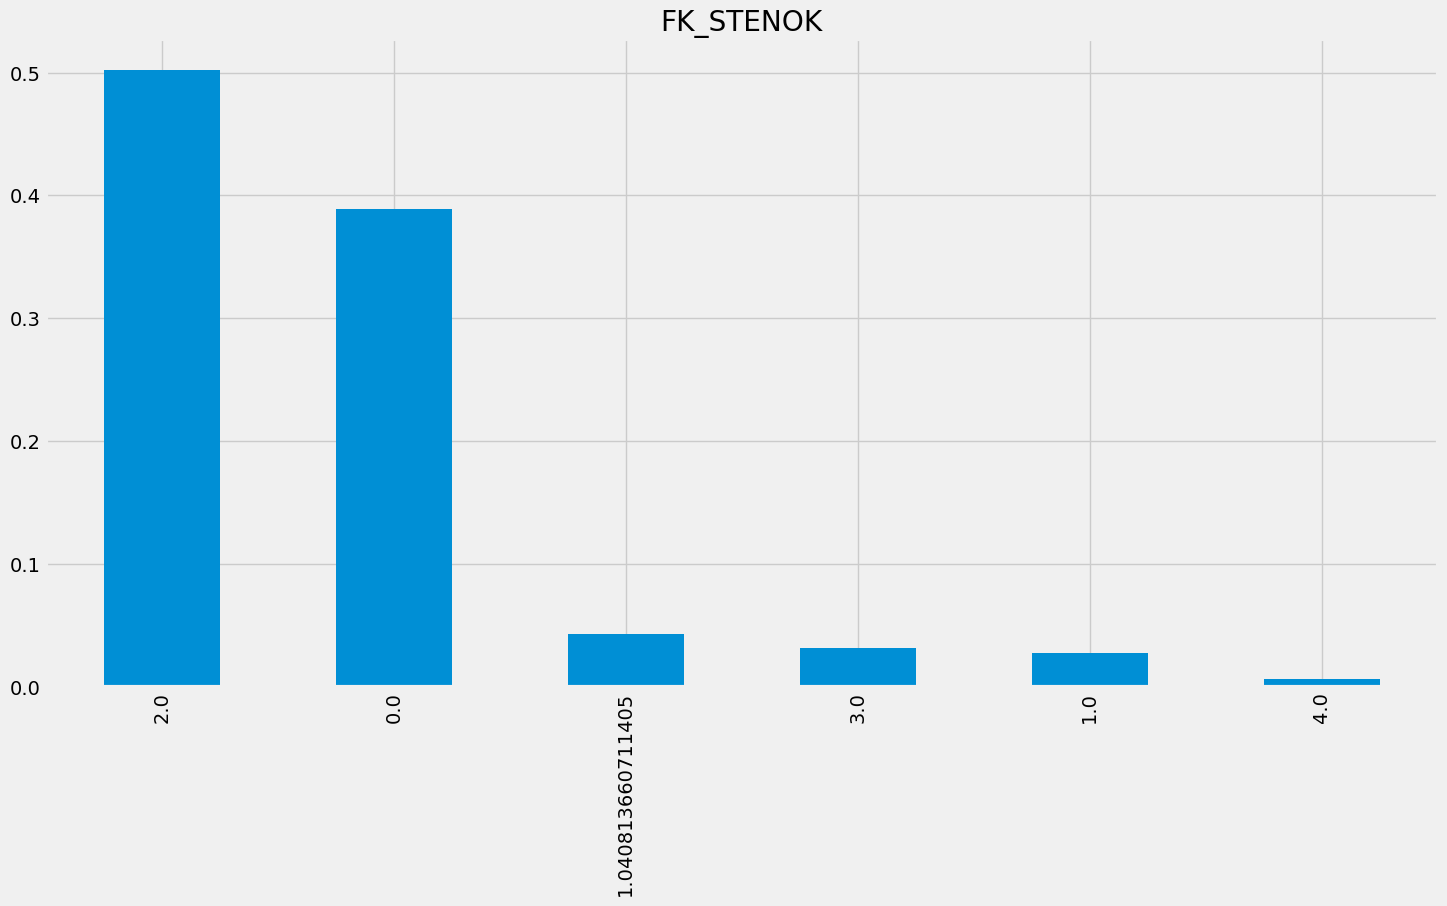

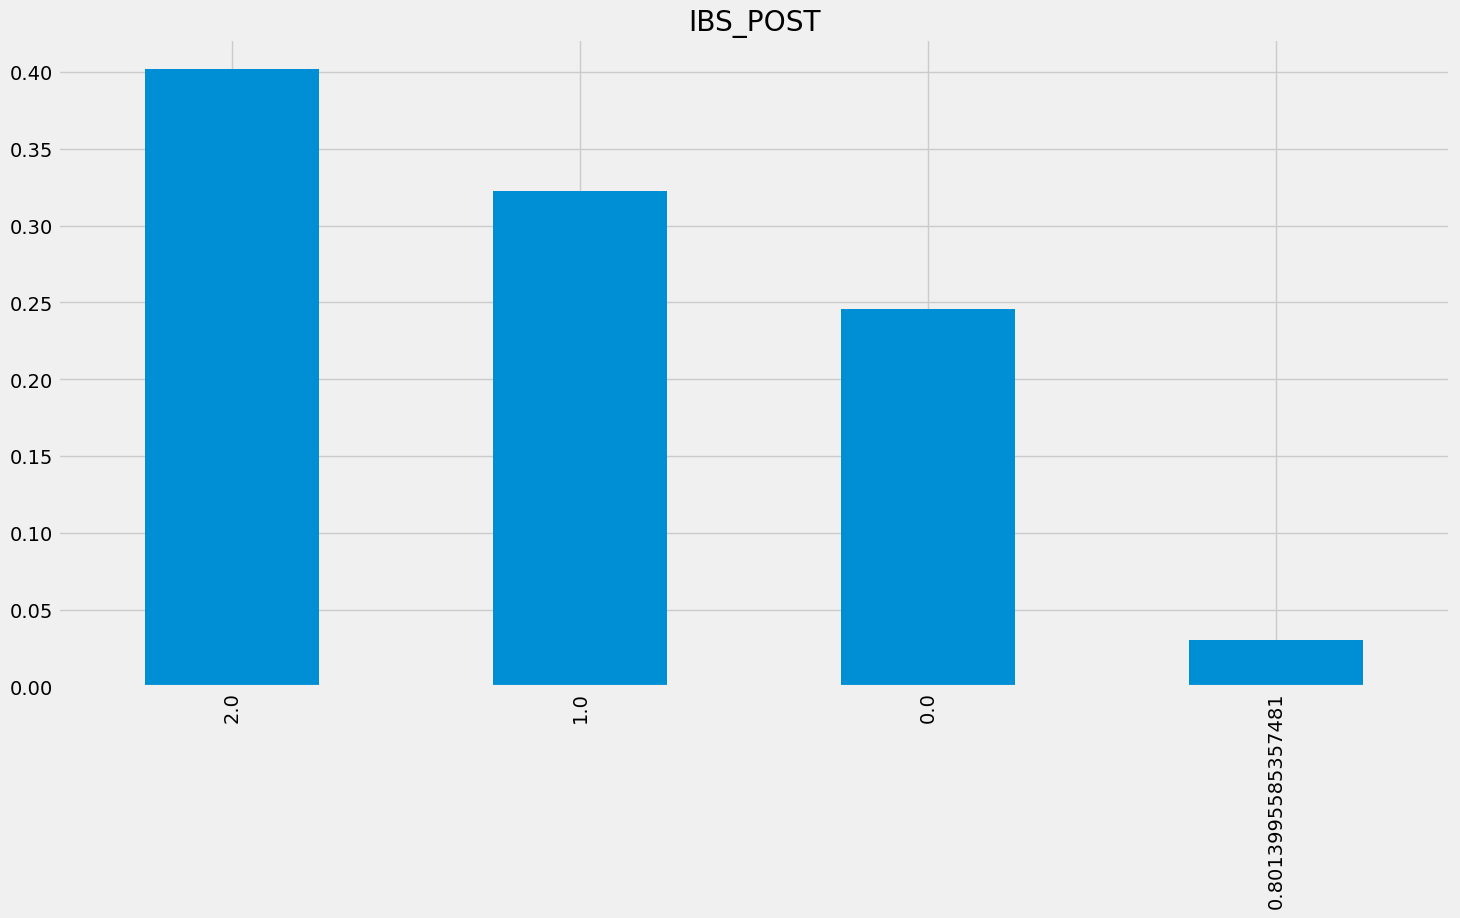

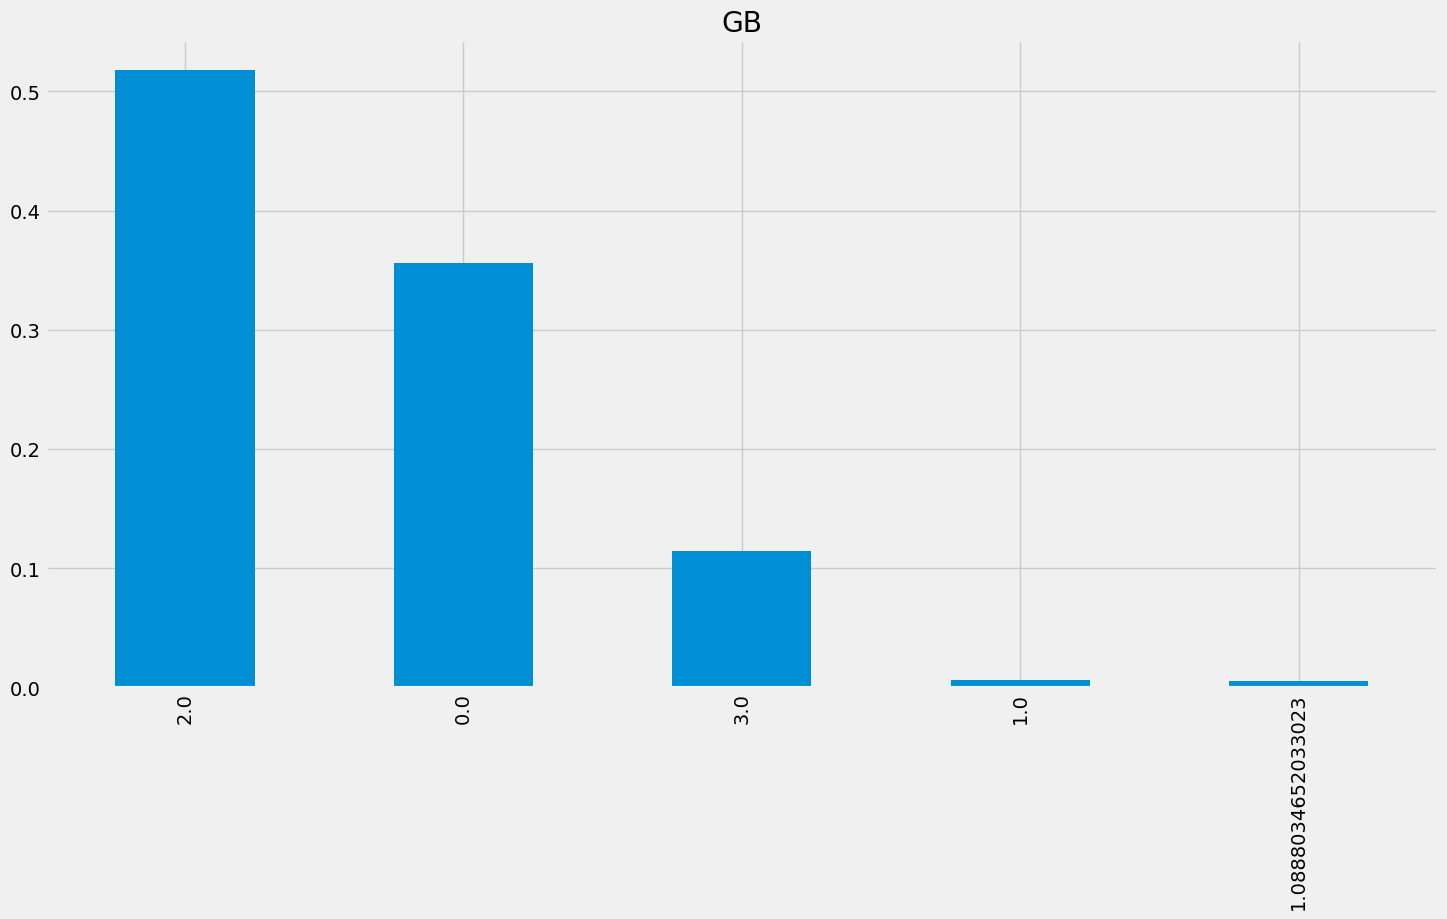

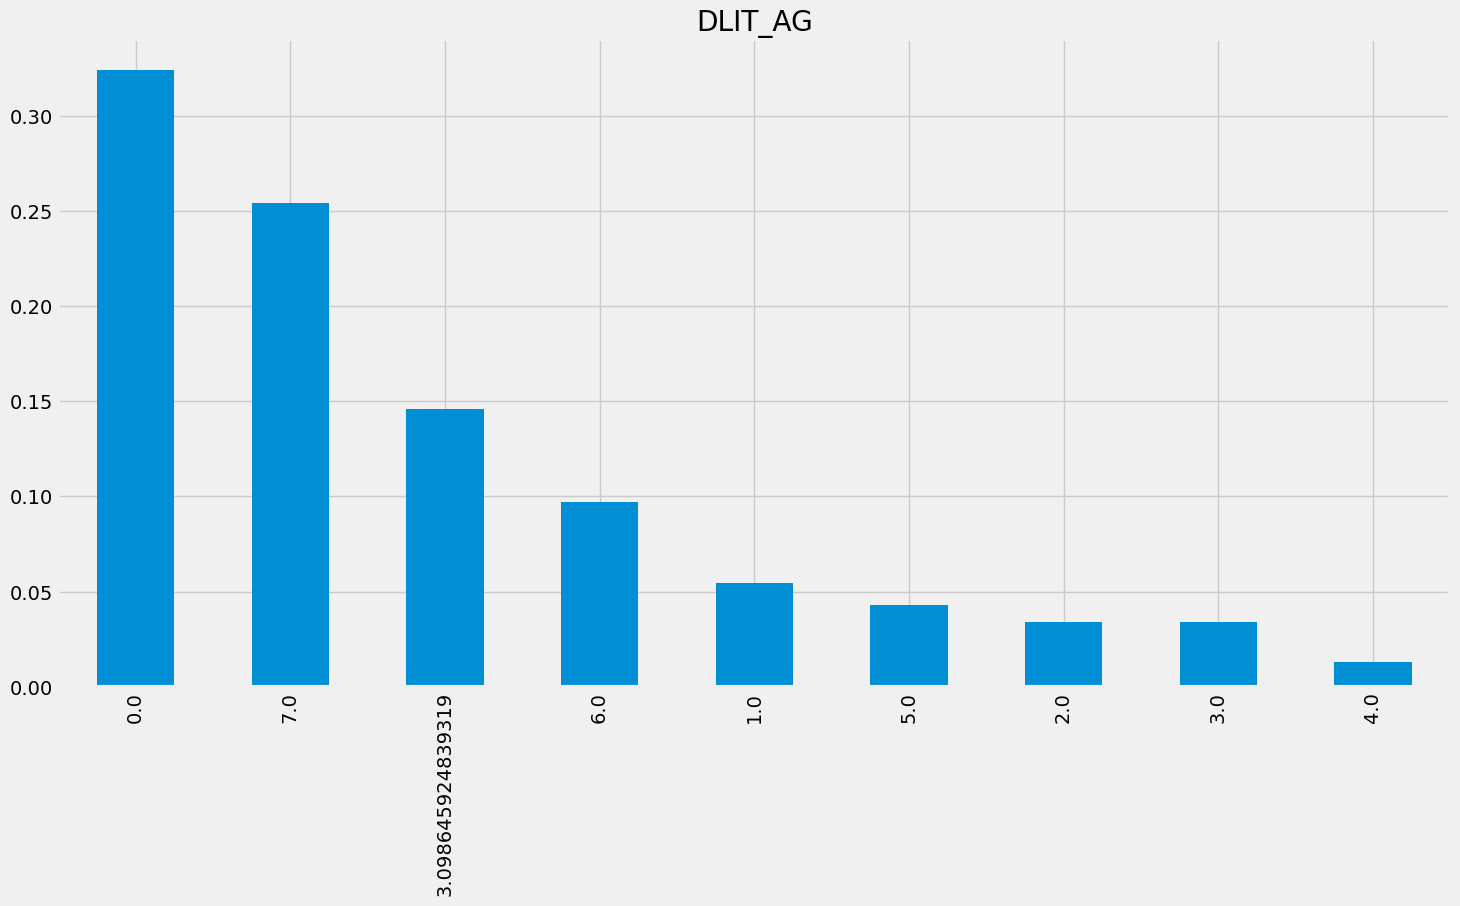

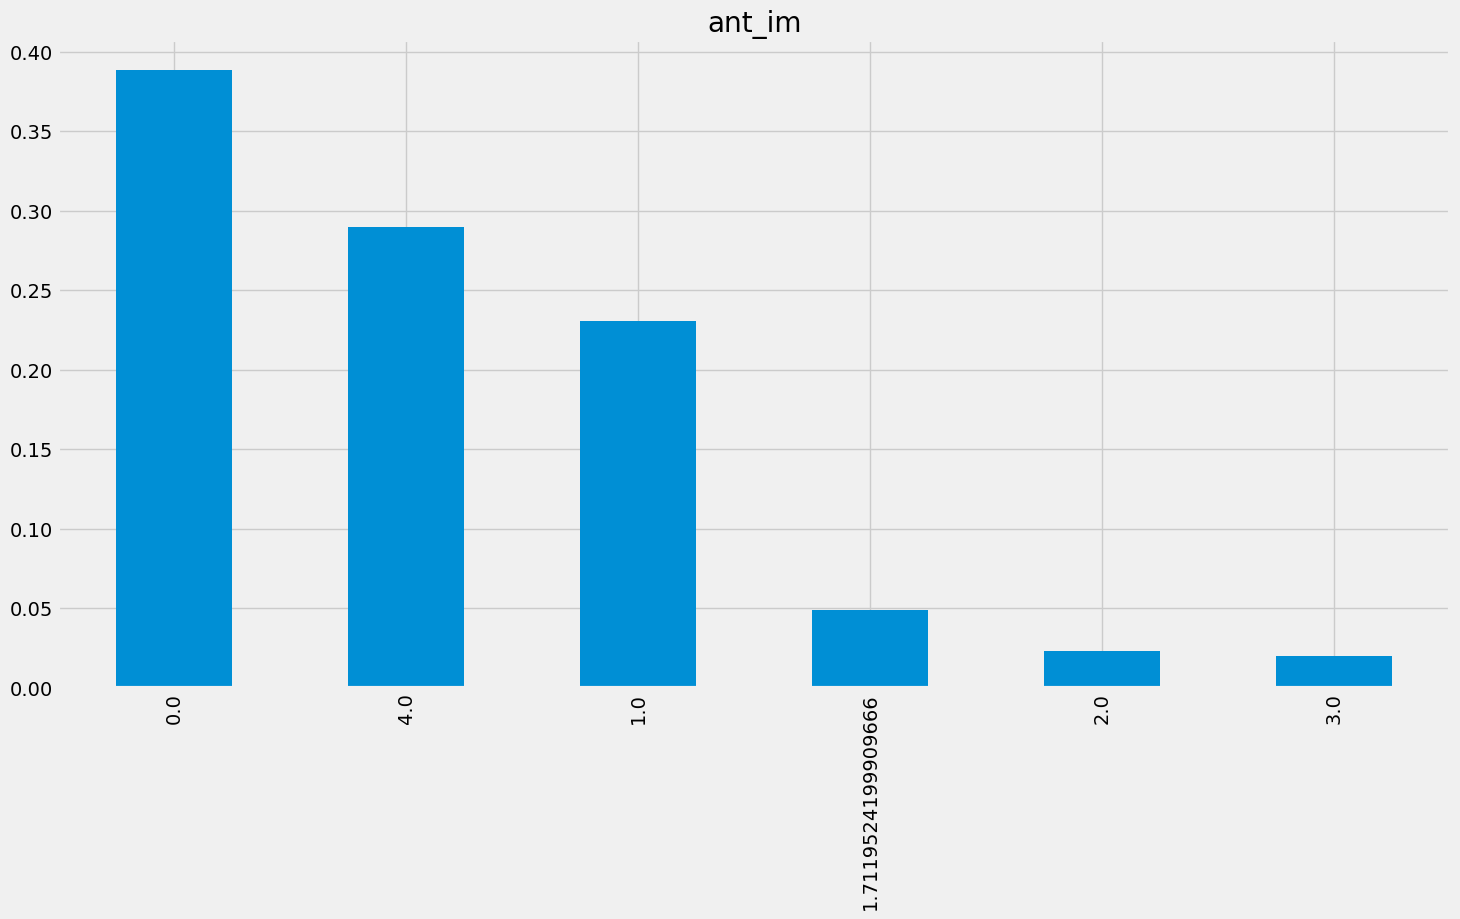

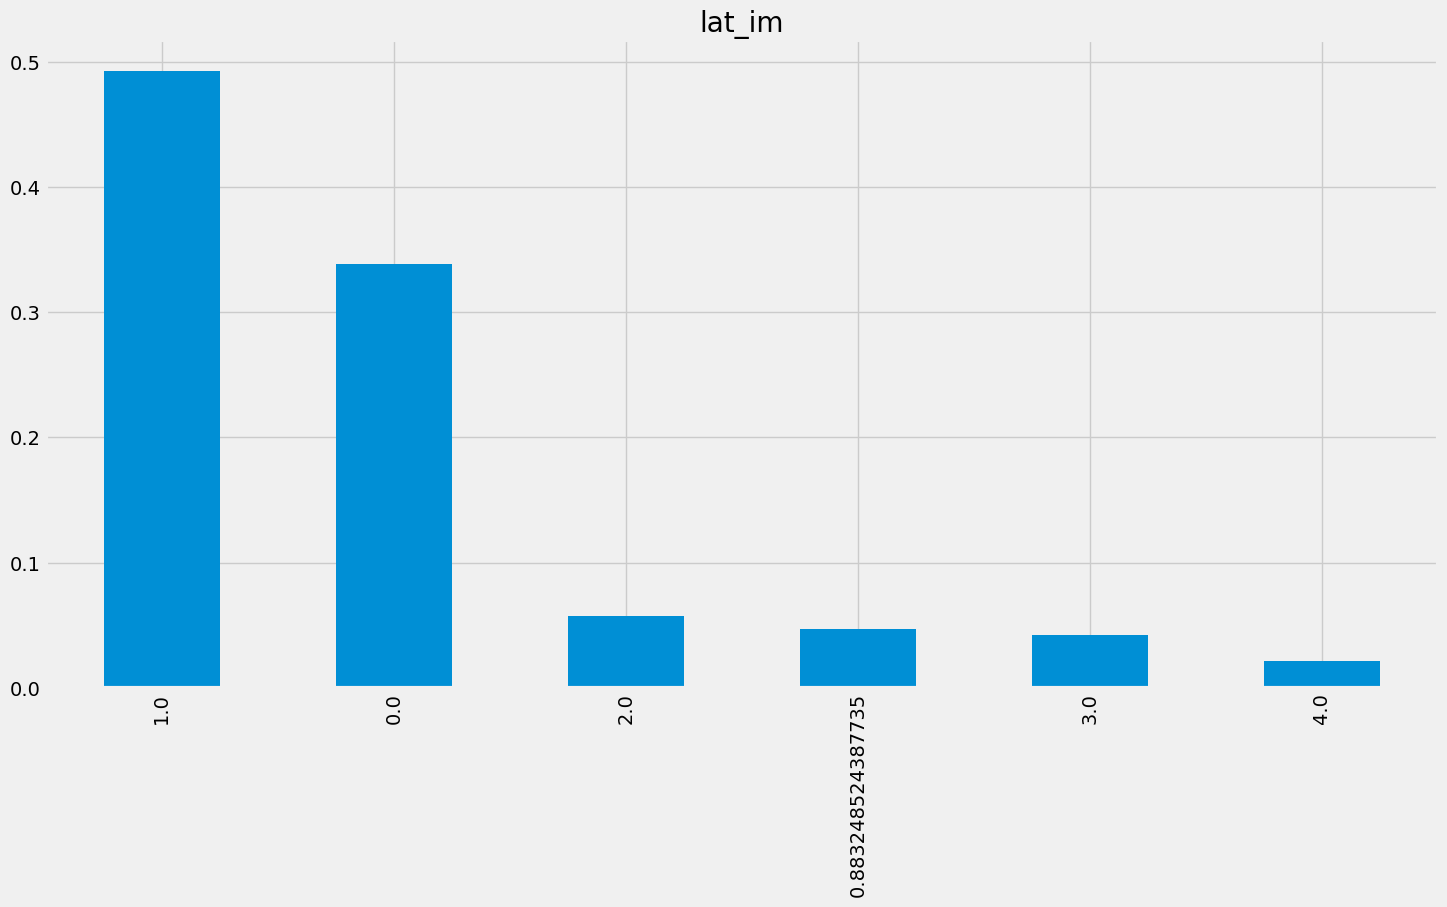

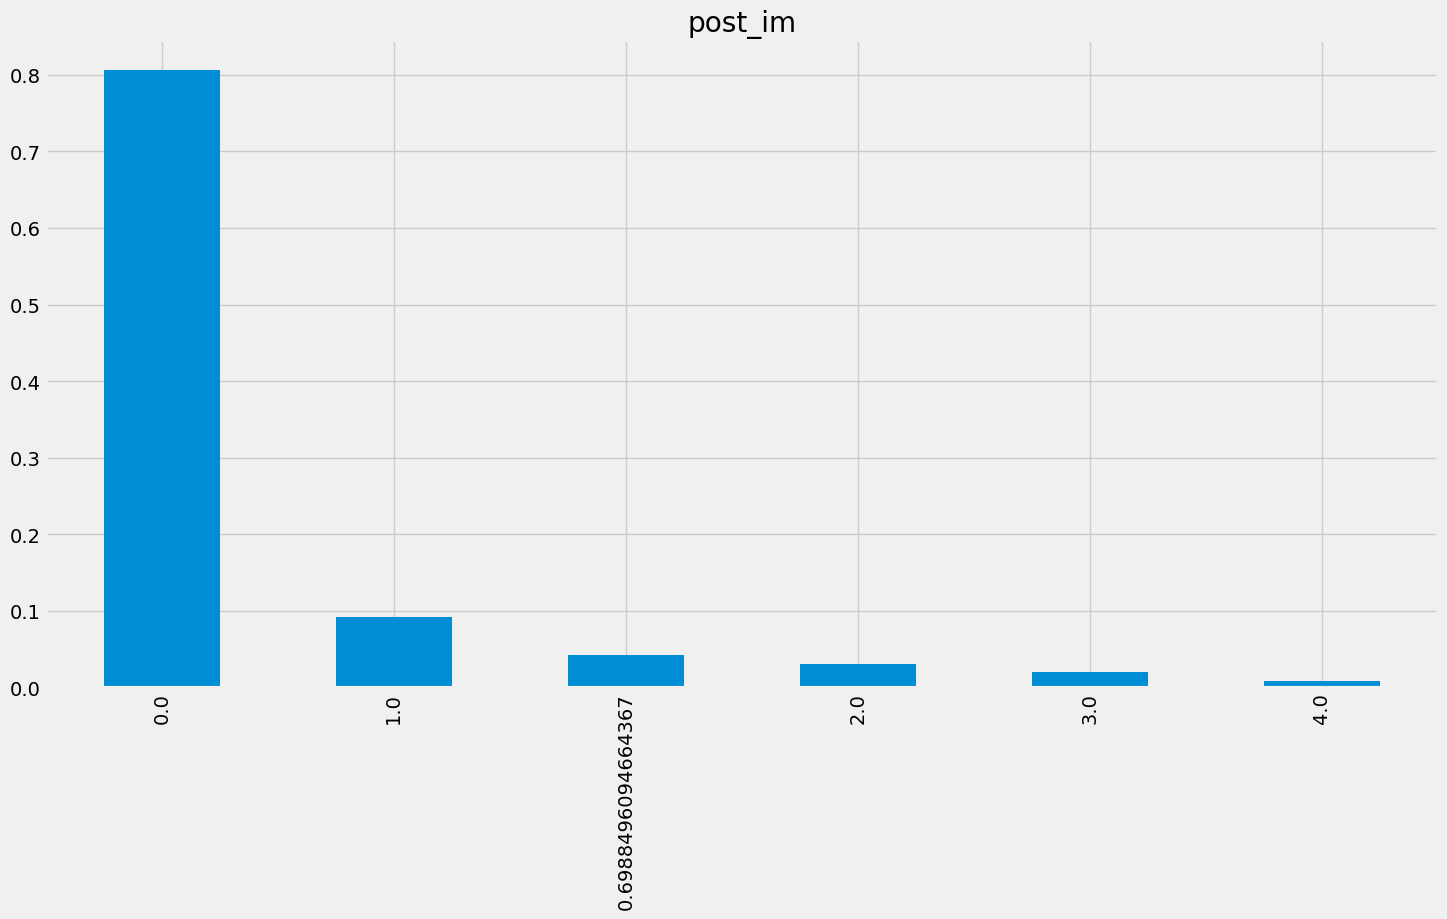

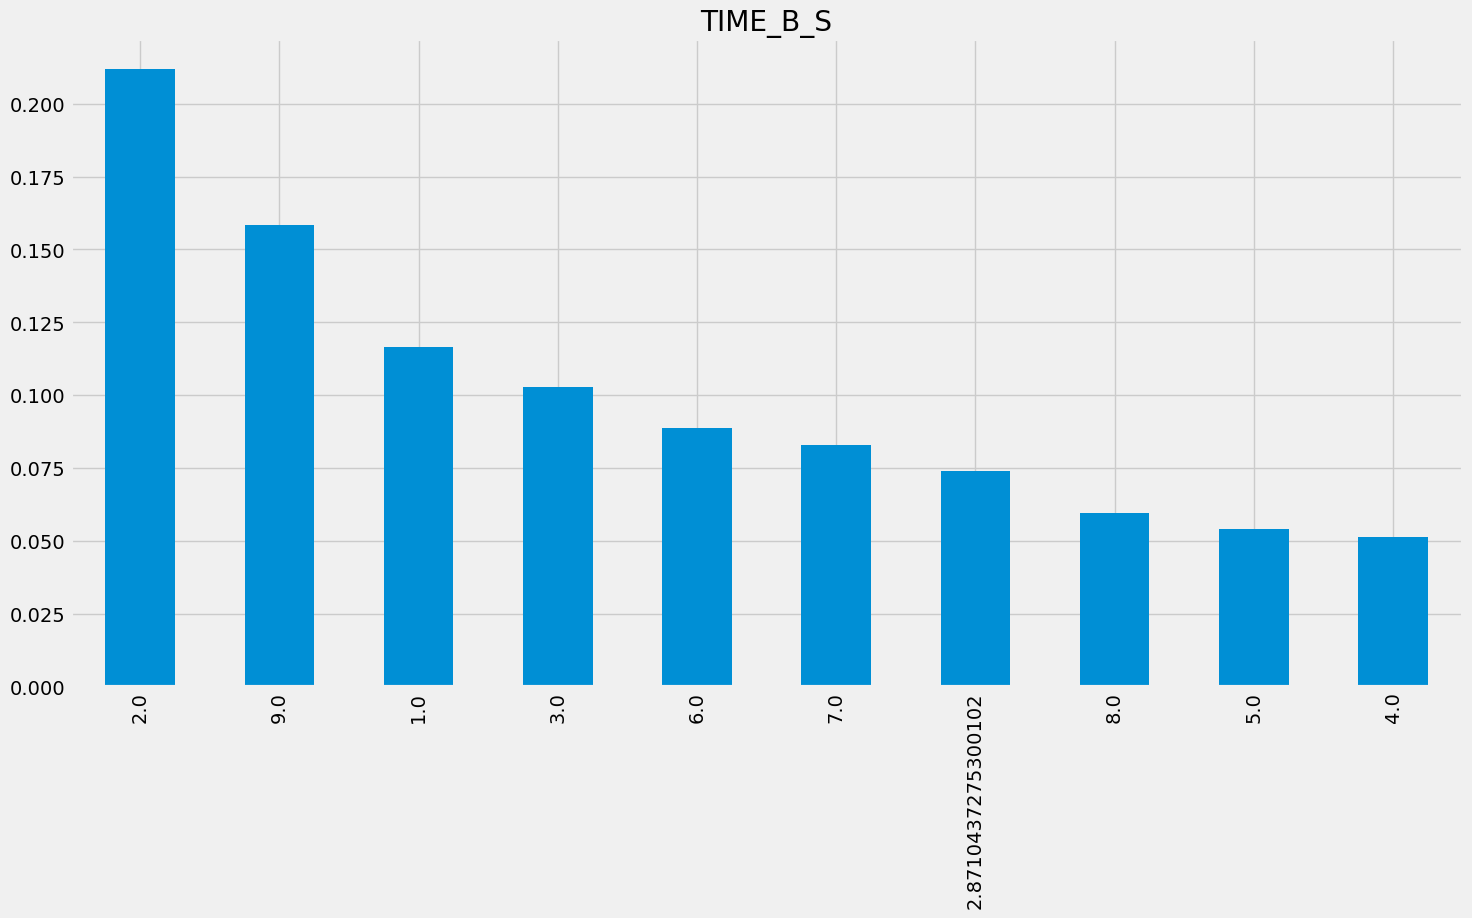

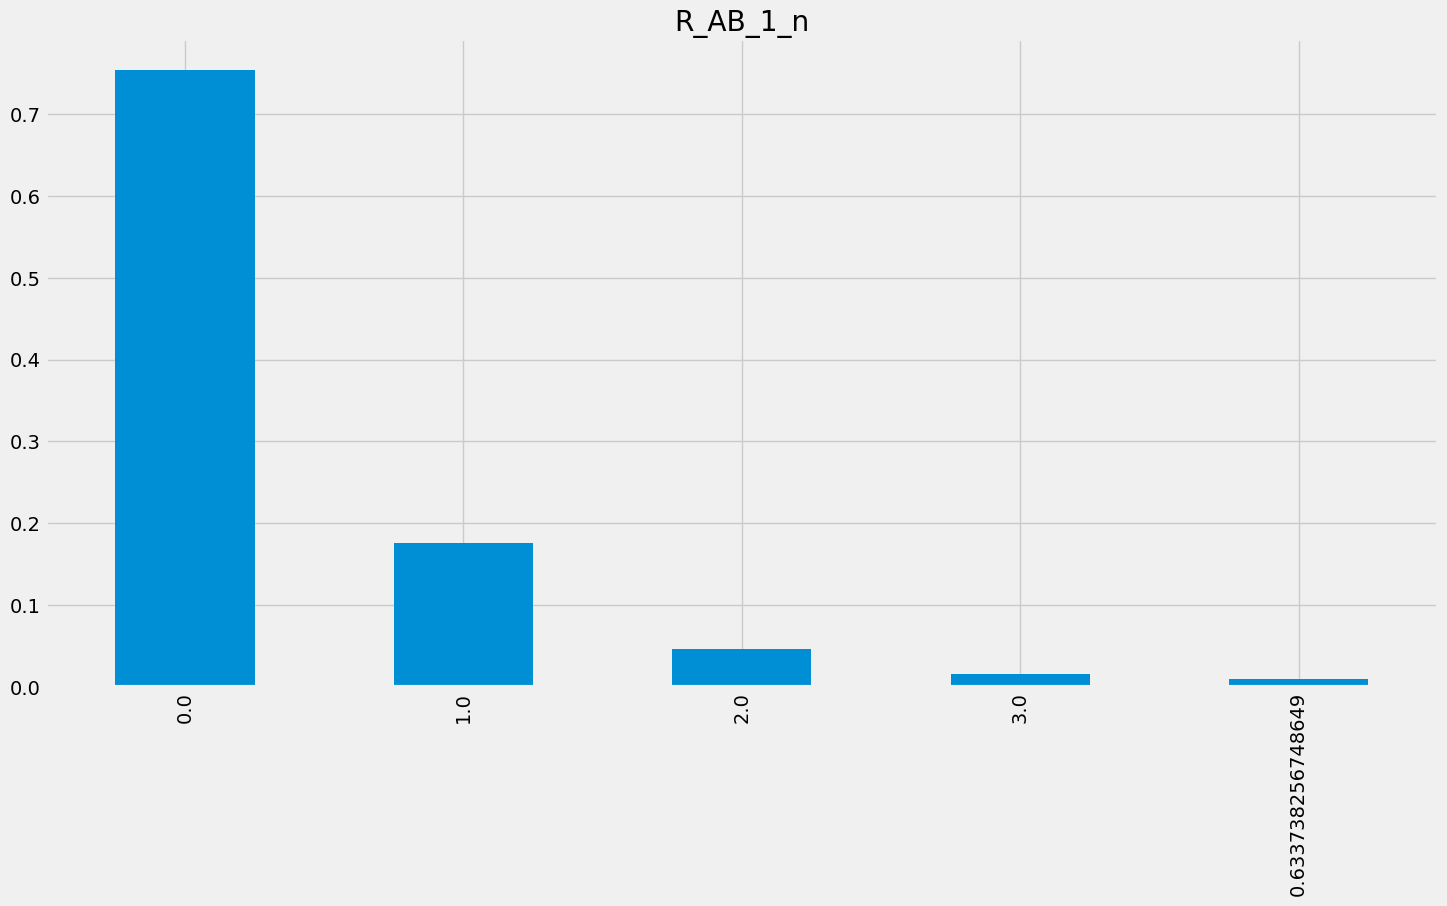

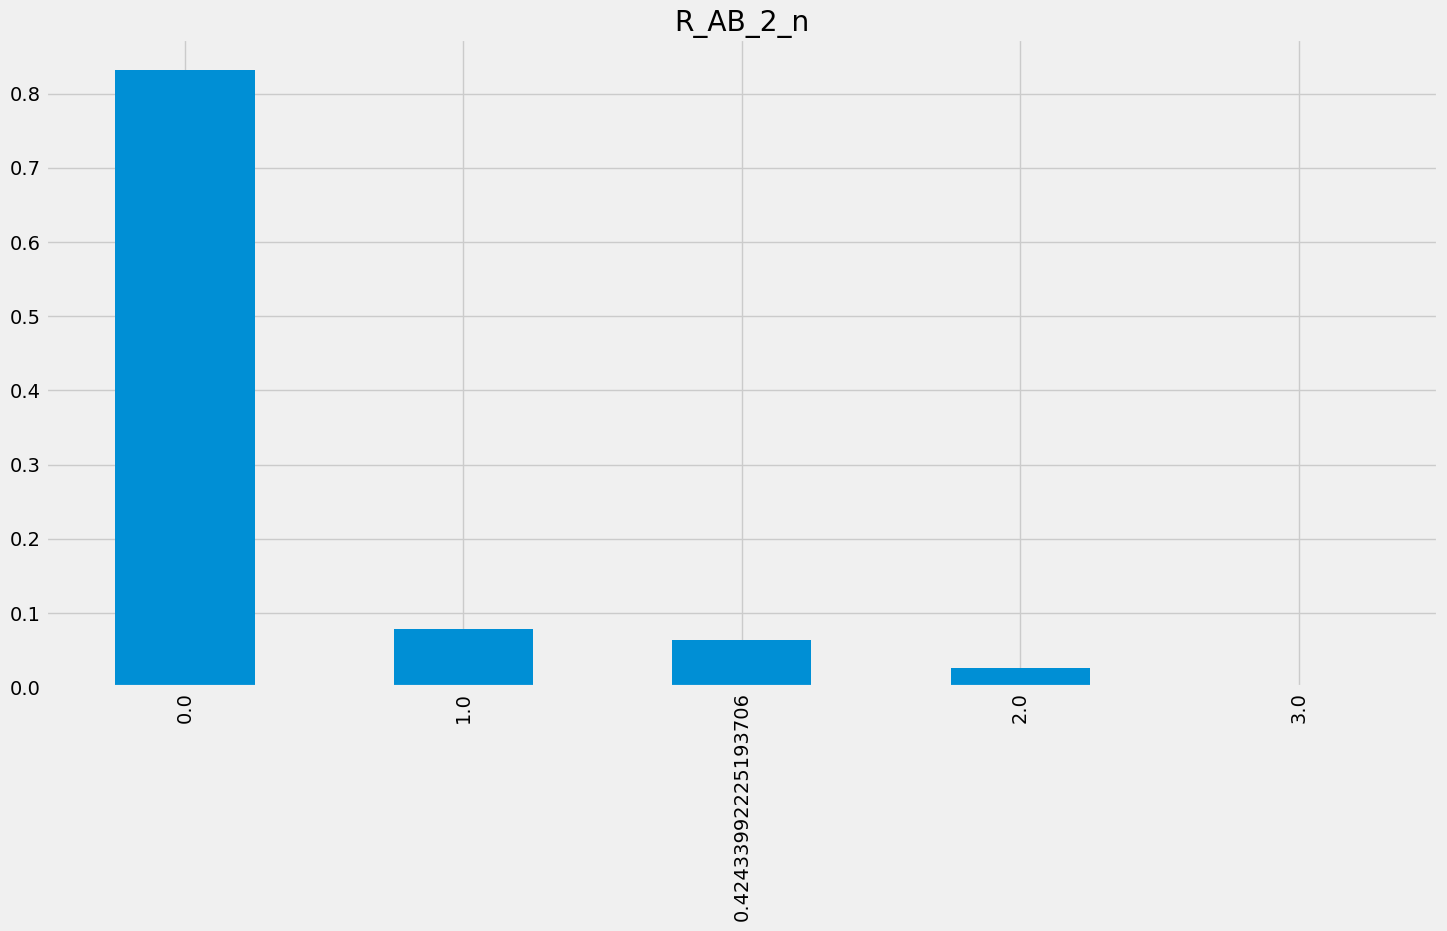

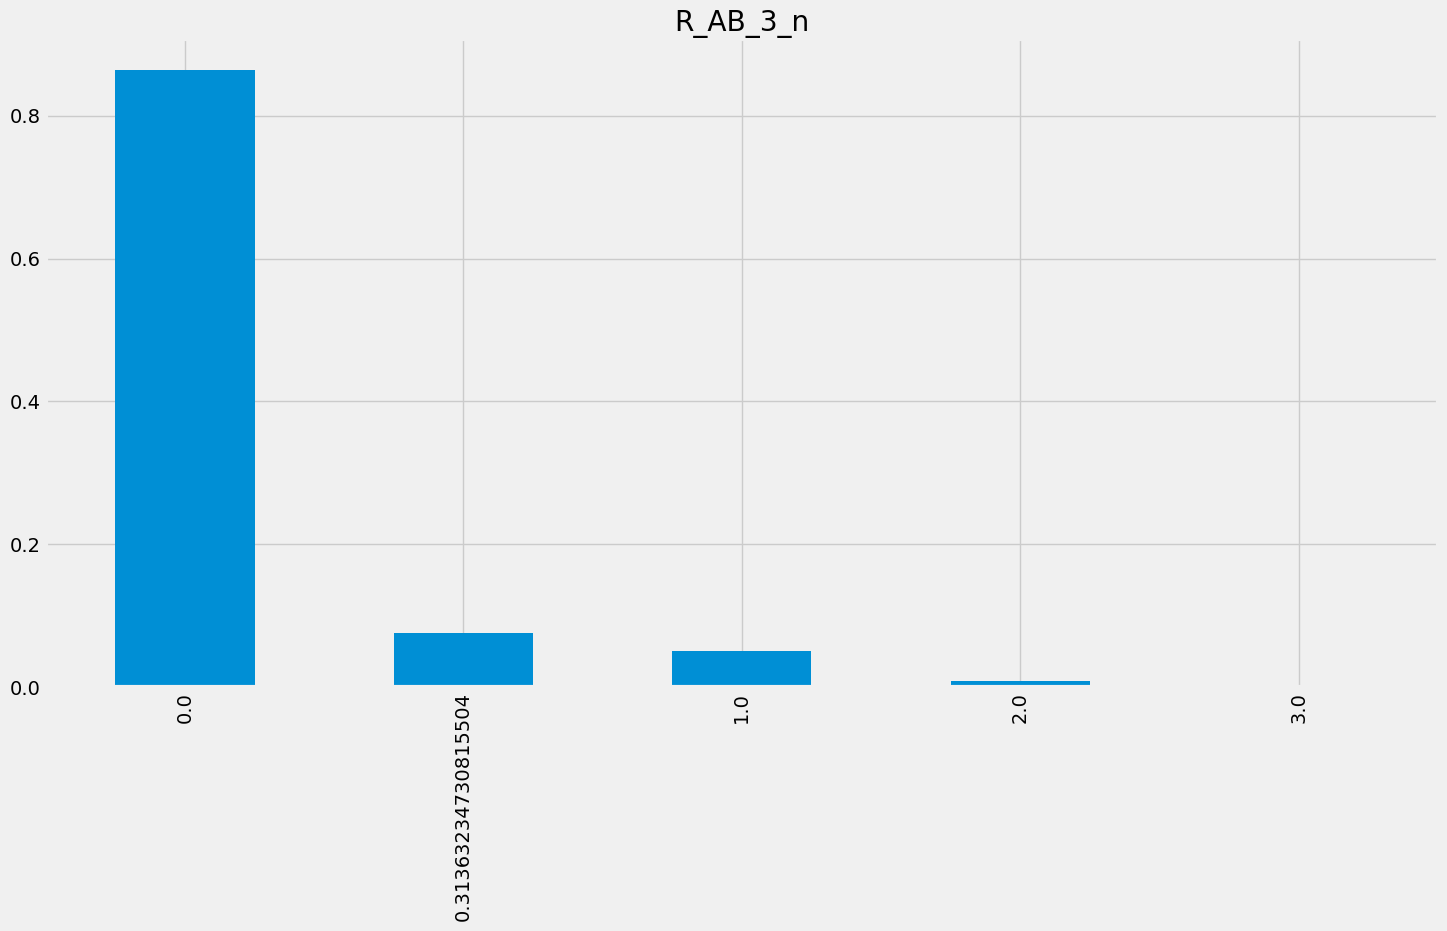

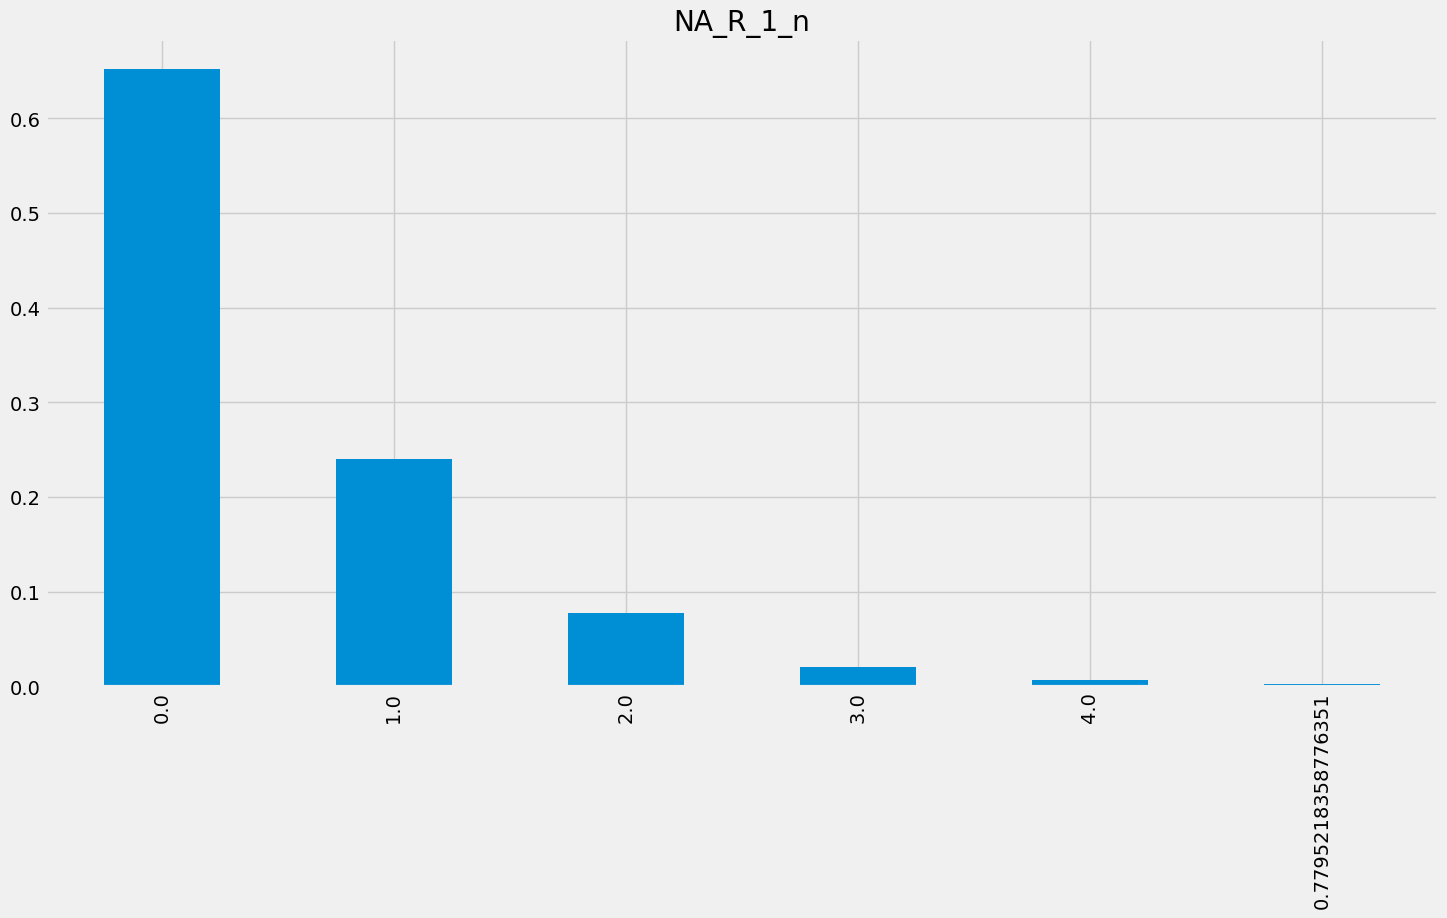

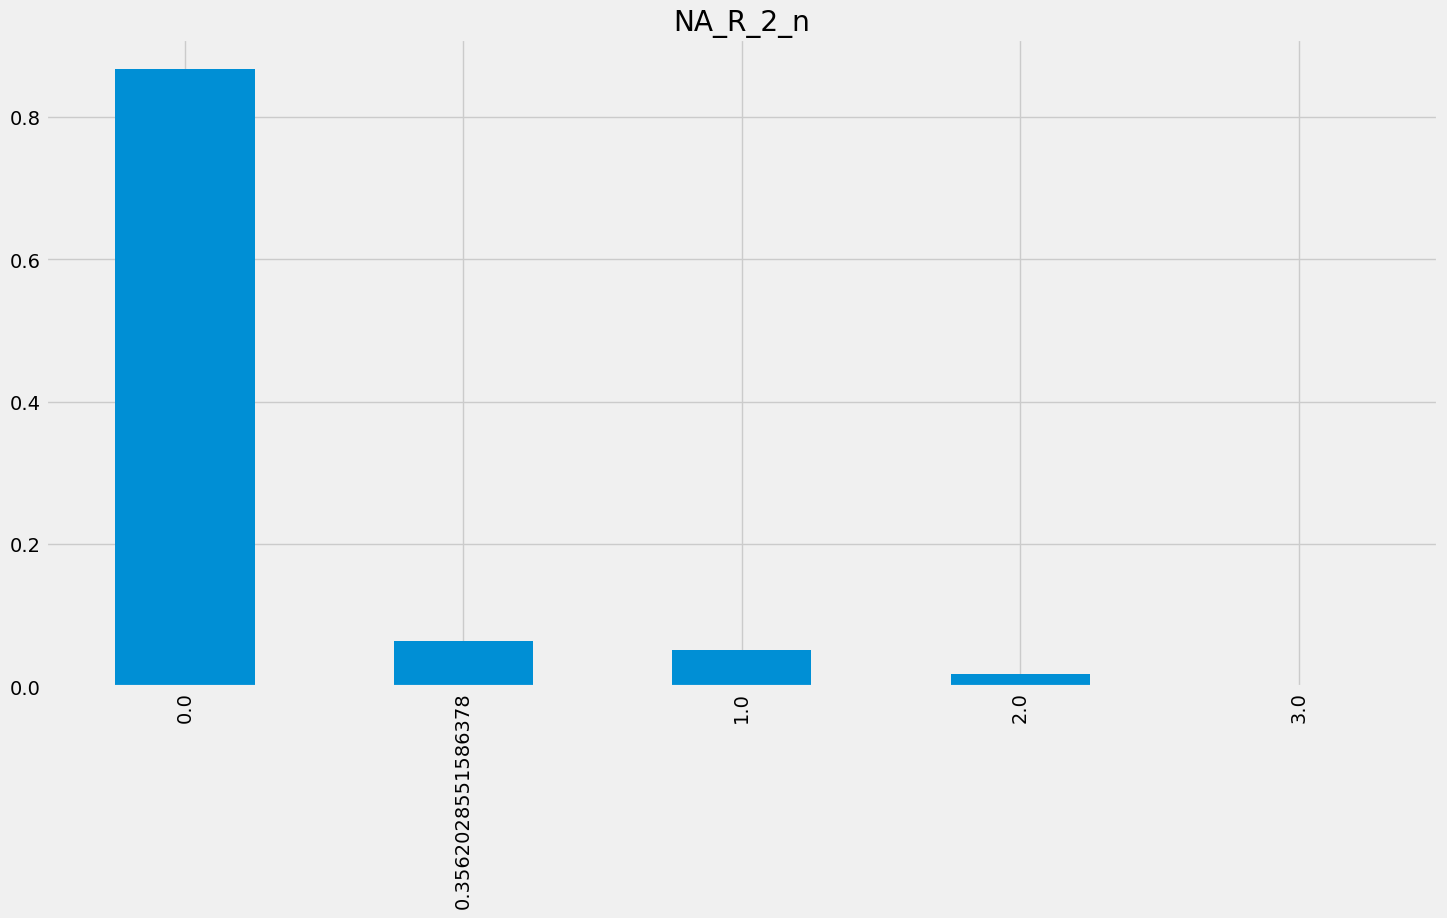

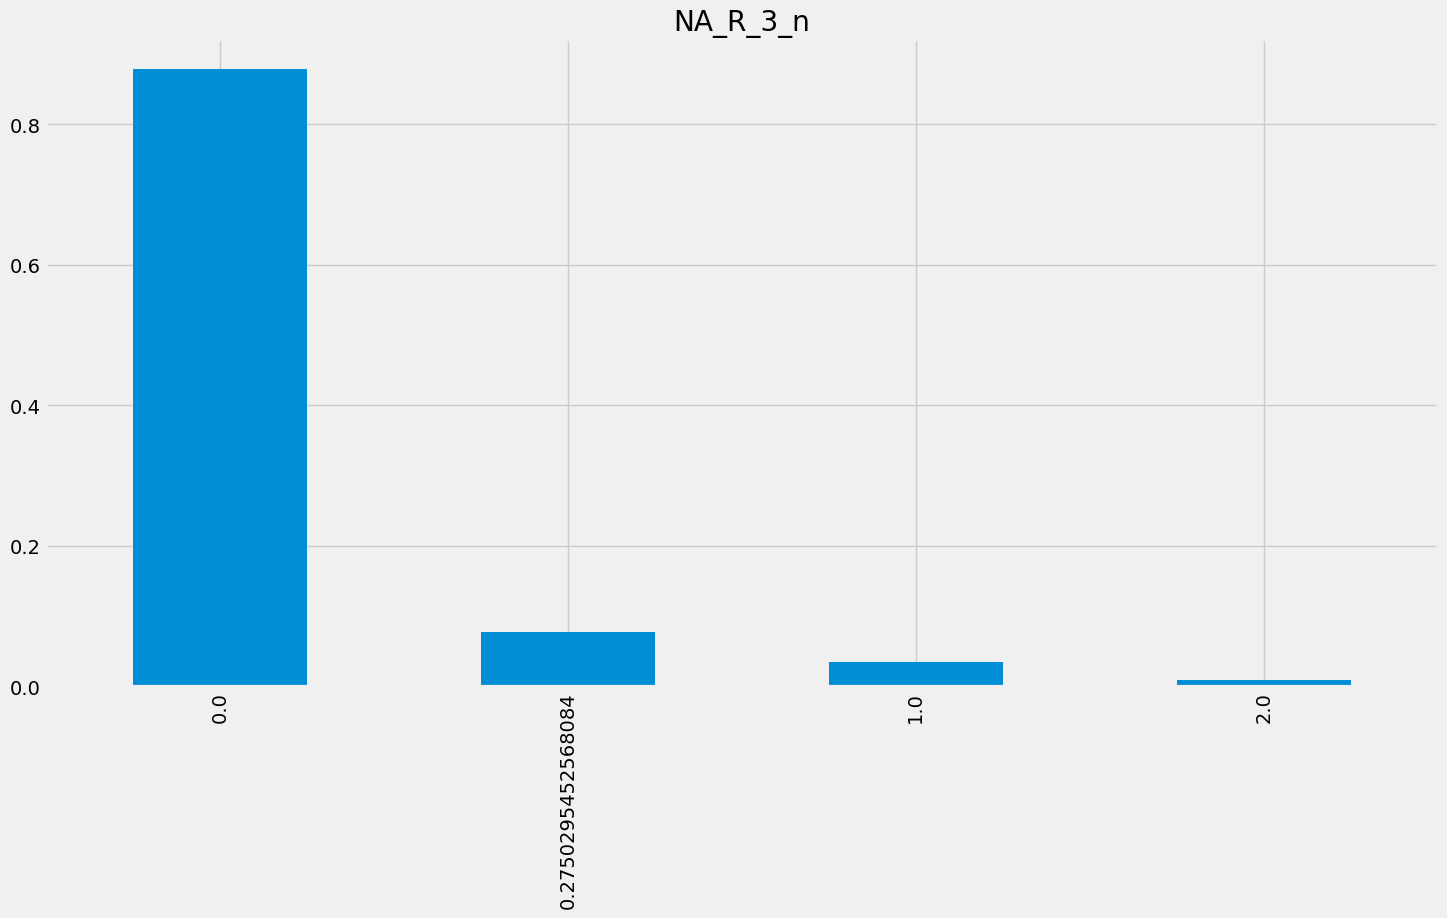

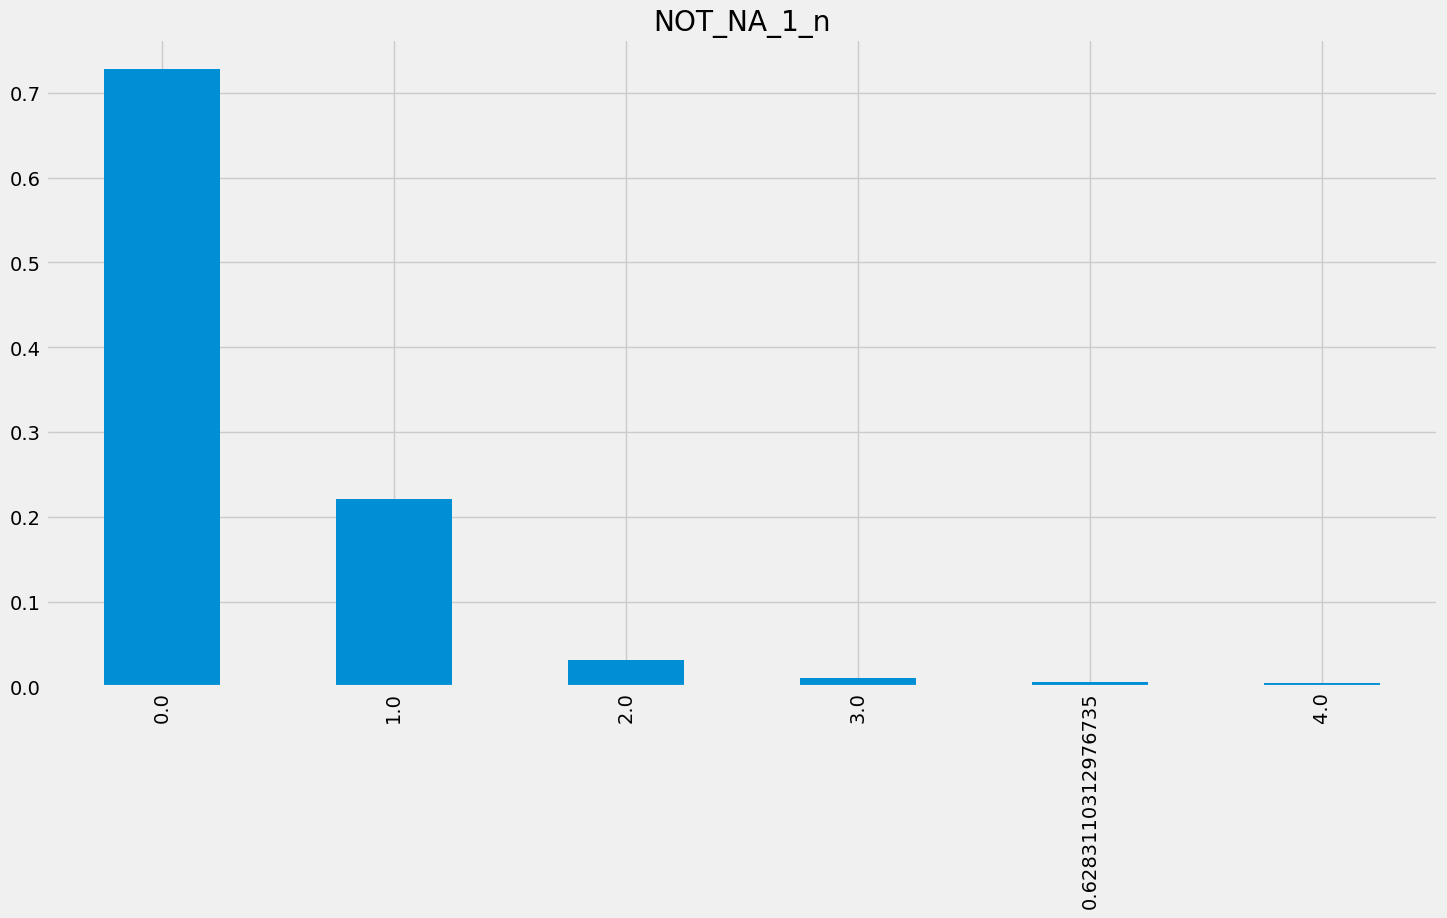

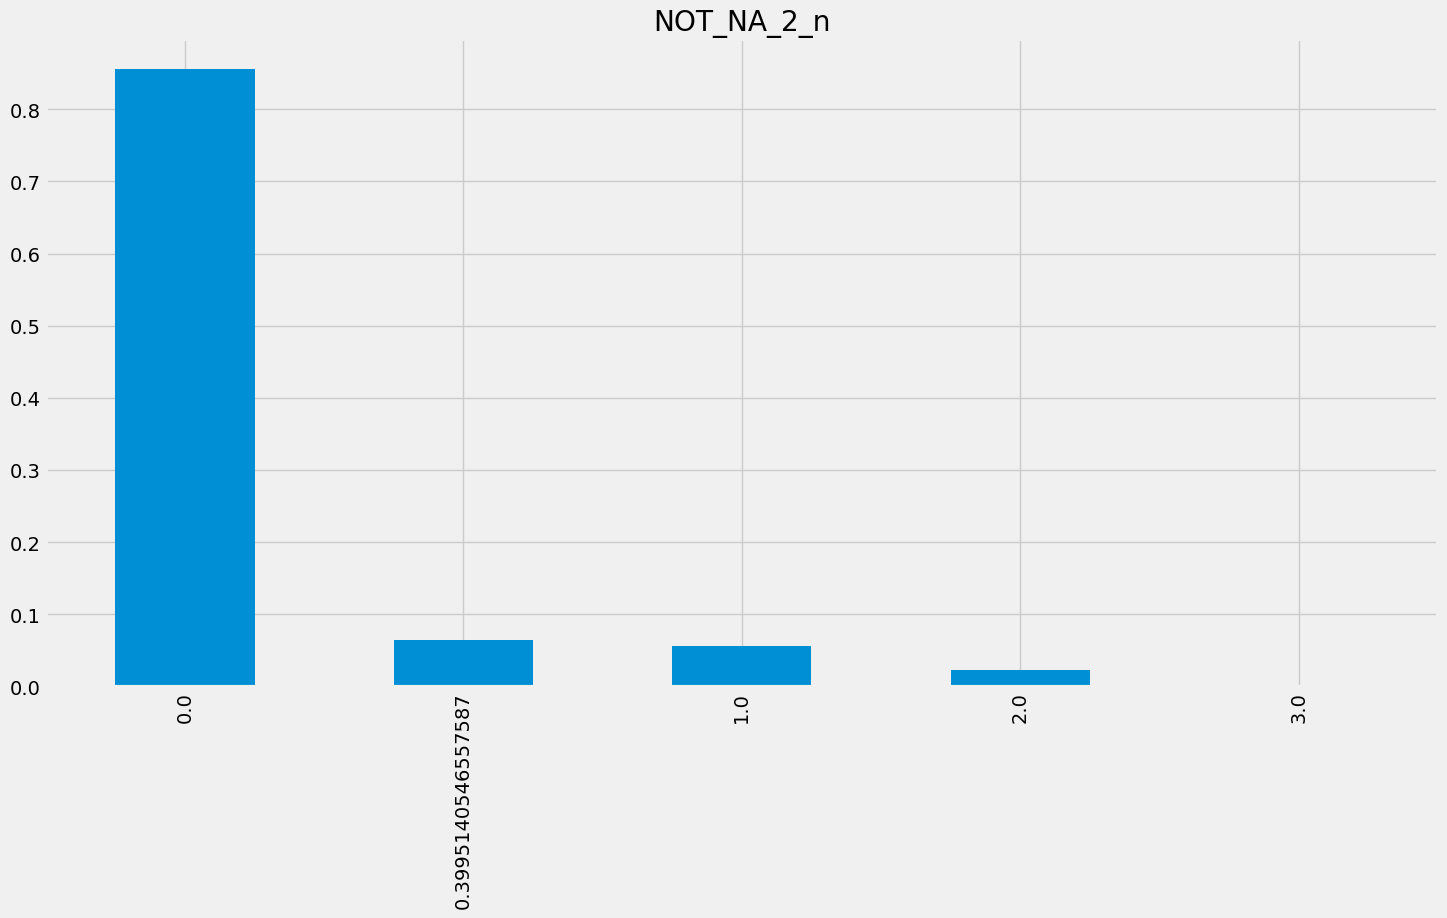

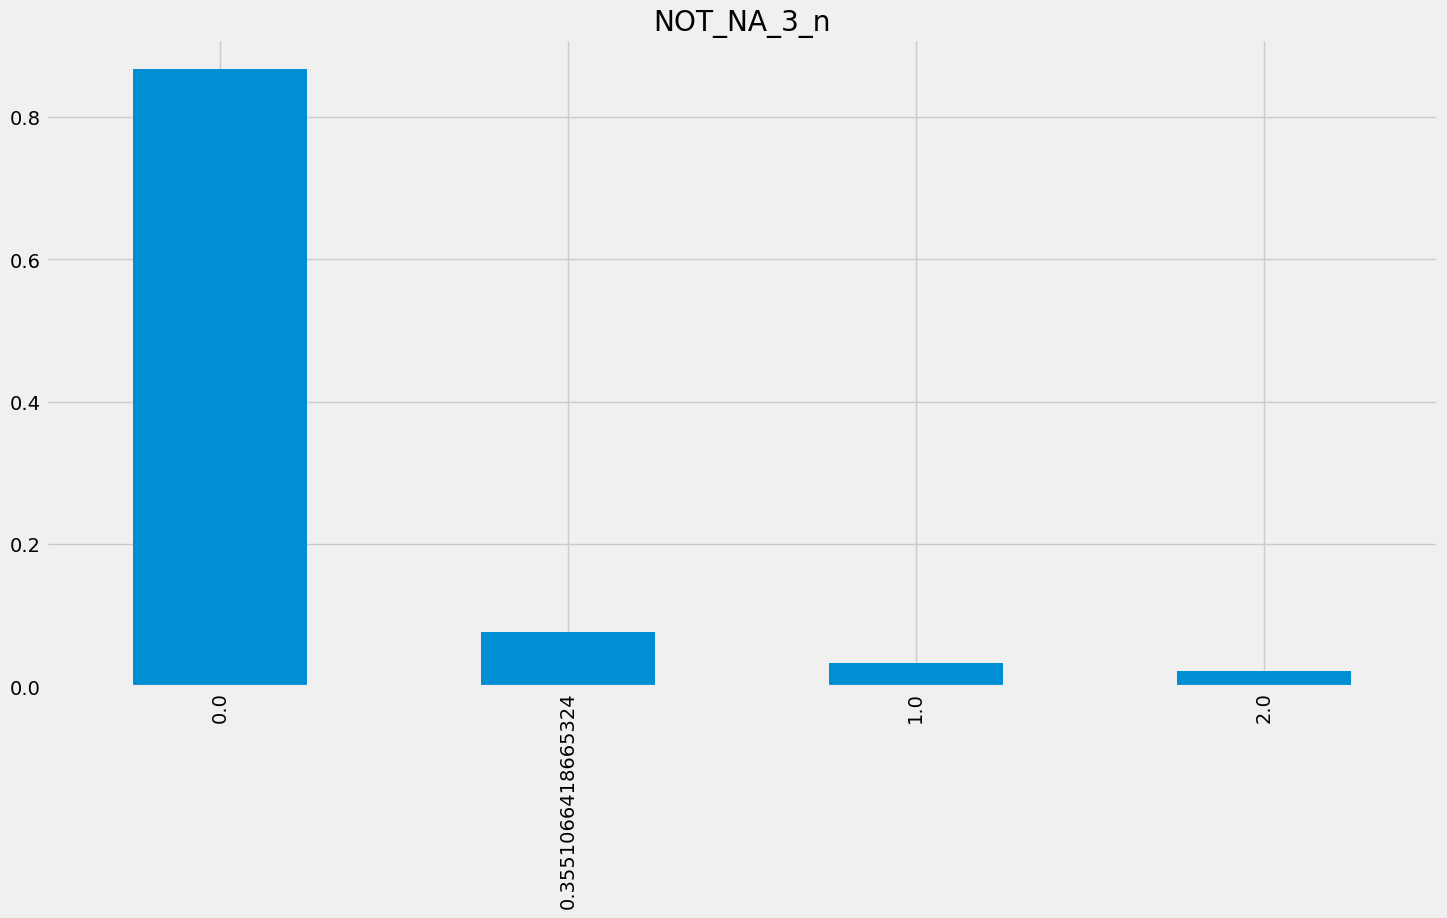

In [32]:
df1['INF_ANAM'].value_counts(normalize=True).plot.bar(title='INF_ANAM')
plt.show()
df1['STENOK_AN'].value_counts(normalize=True).plot.bar(title='STENOK_AN')
plt.show()
df1['FK_STENOK'].value_counts(normalize=True).plot.bar(title='FK_STENOK')
plt.show()
df1['IBS_POST'].value_counts(normalize=True).plot.bar(title='IBS_POST')
plt.show()
df1['GB'].value_counts(normalize=True).plot.bar(title='GB')
plt.show()
df1['DLIT_AG'].value_counts(normalize=True).plot.bar(title='DLIT_AG')
plt.show()
df1['ant_im'].value_counts(normalize=True).plot.bar(title='ant_im')
plt.show()
df1['lat_im'].value_counts(normalize=True).plot.bar(title='lat_im')
plt.show()
df1['post_im'].value_counts(normalize=True).plot.bar(title='post_im')
plt.show()
df1['TIME_B_S'].value_counts(normalize=True).plot.bar(title='TIME_B_S')
plt.show()
df1['R_AB_1_n'].value_counts(normalize=True).plot.bar(title='R_AB_1_n')
plt.show()
df1['R_AB_2_n'].value_counts(normalize=True).plot.bar(title='R_AB_2_n')
plt.show()
df1['R_AB_3_n'].value_counts(normalize=True).plot.bar(title='R_AB_3_n')
plt.show()
df1['NA_R_1_n'].value_counts(normalize=True).plot.bar(title='NA_R_1_n')
plt.show()
df1['NA_R_2_n'].value_counts(normalize=True).plot.bar(title='NA_R_2_n')
plt.show()
df1['NA_R_3_n'].value_counts(normalize=True).plot.bar(title='NA_R_3_n')
plt.show()
df1['NOT_NA_1_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_1_n')
plt.show()
df1['NOT_NA_2_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_2_n')
plt.show()
df1['NOT_NA_3_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_3_n')
plt.show()

# Independent Variable : Numerical

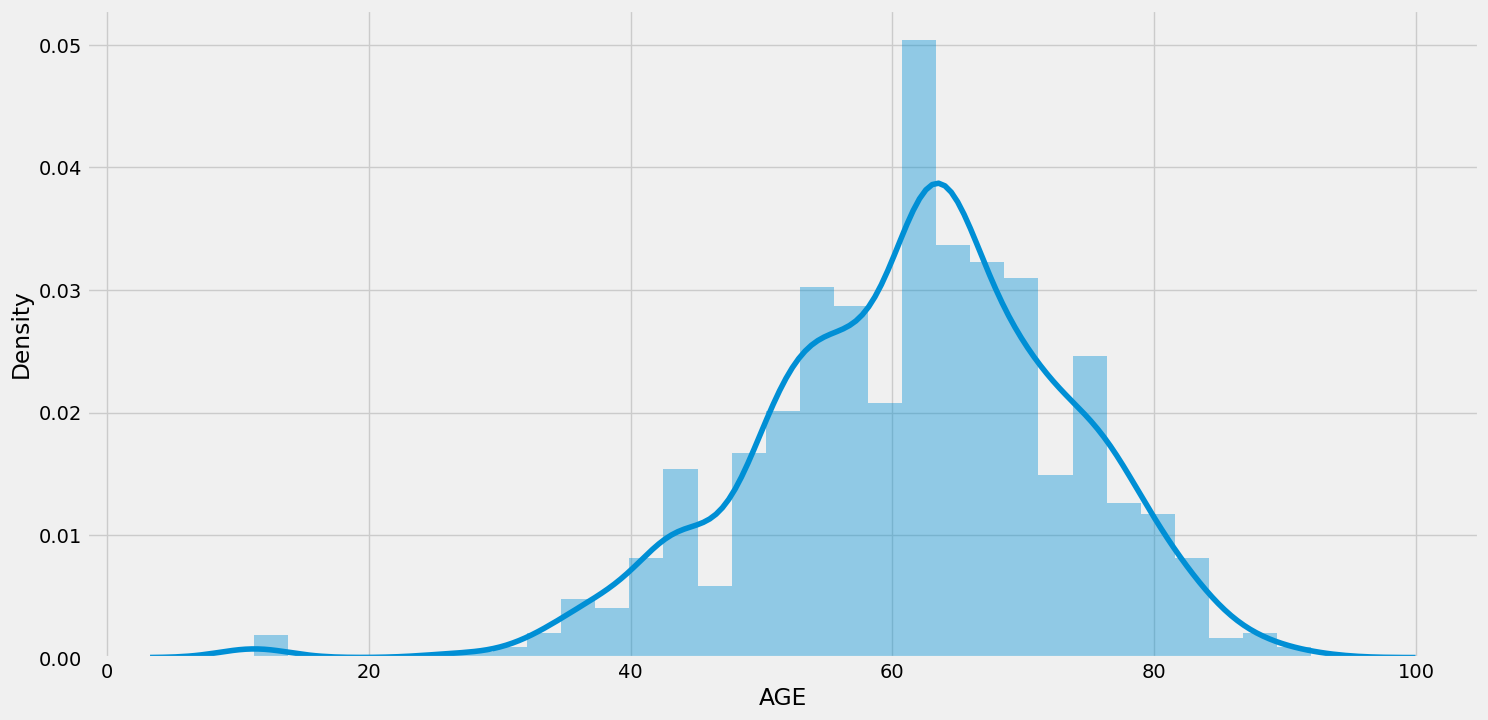

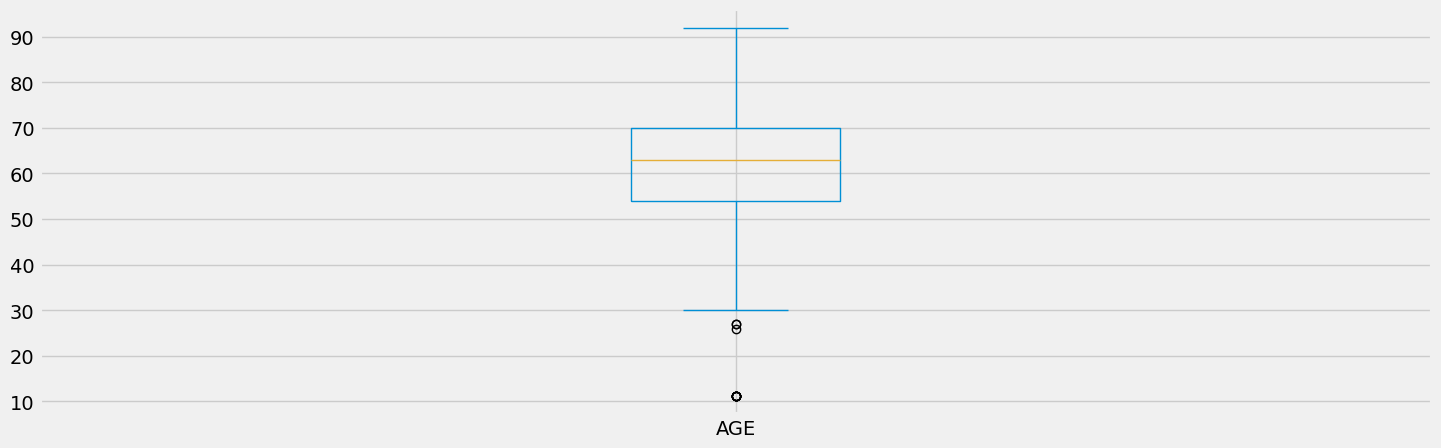

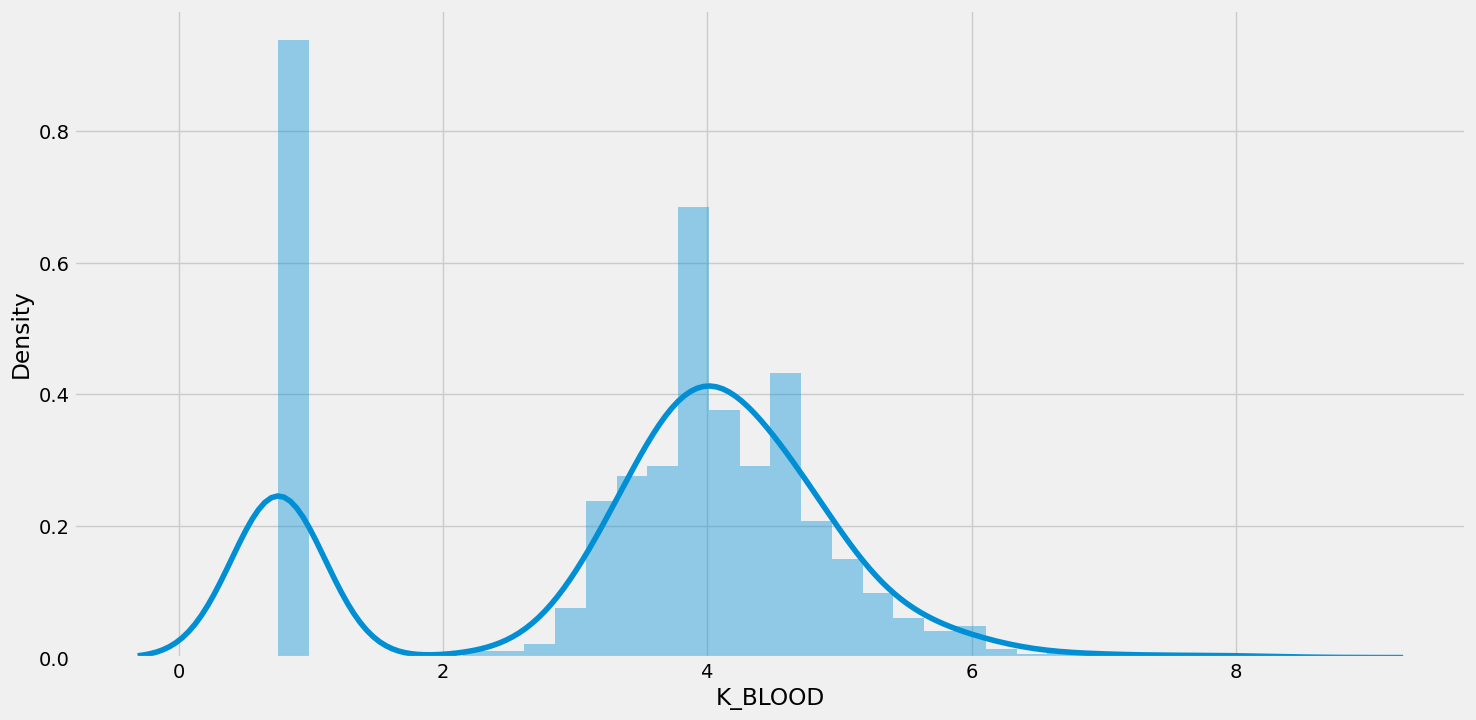

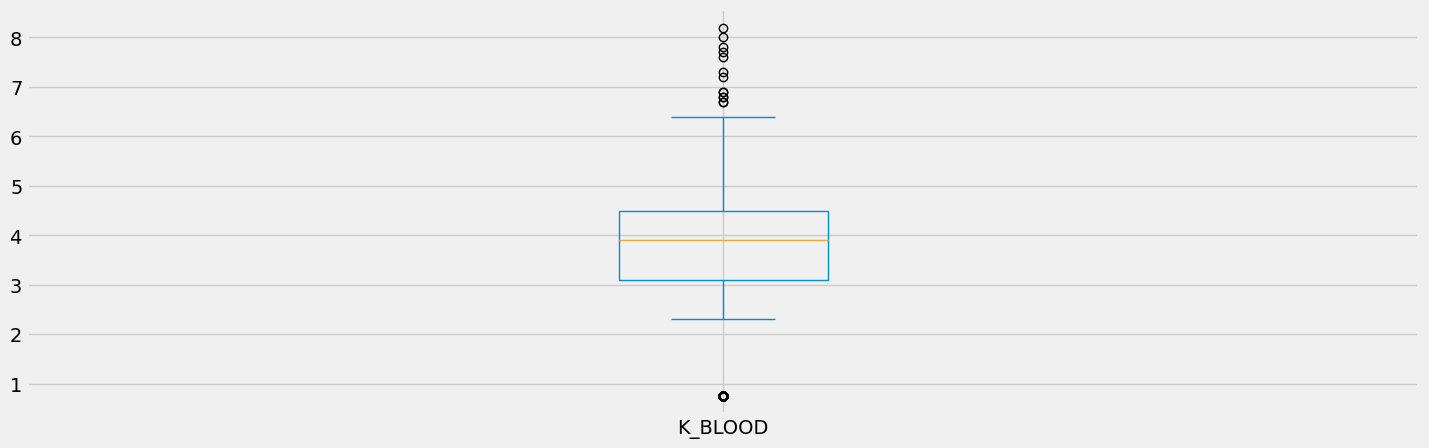

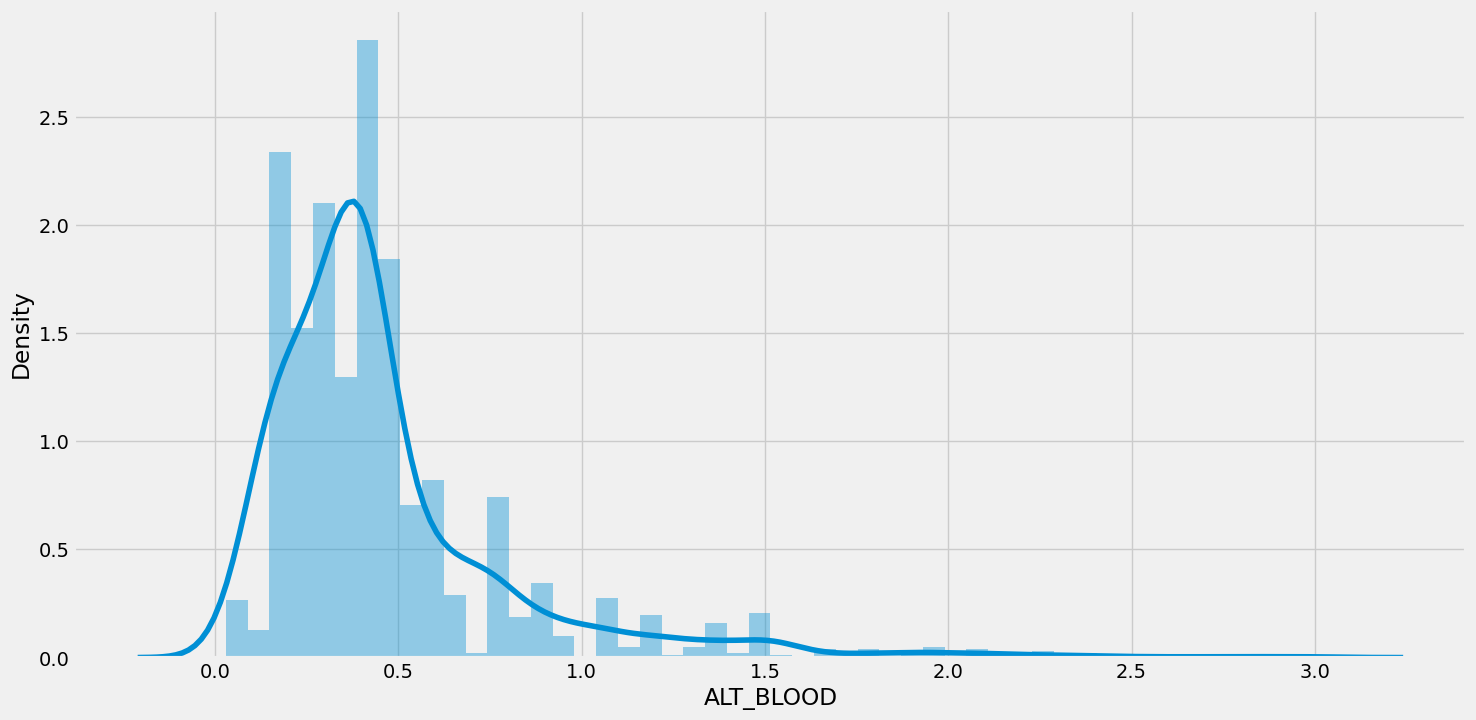

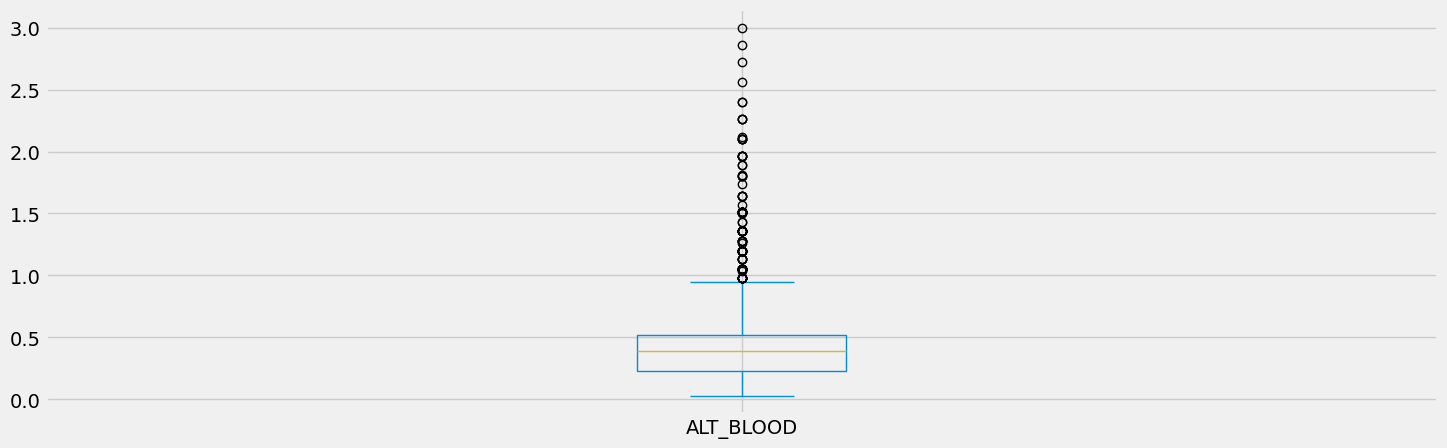

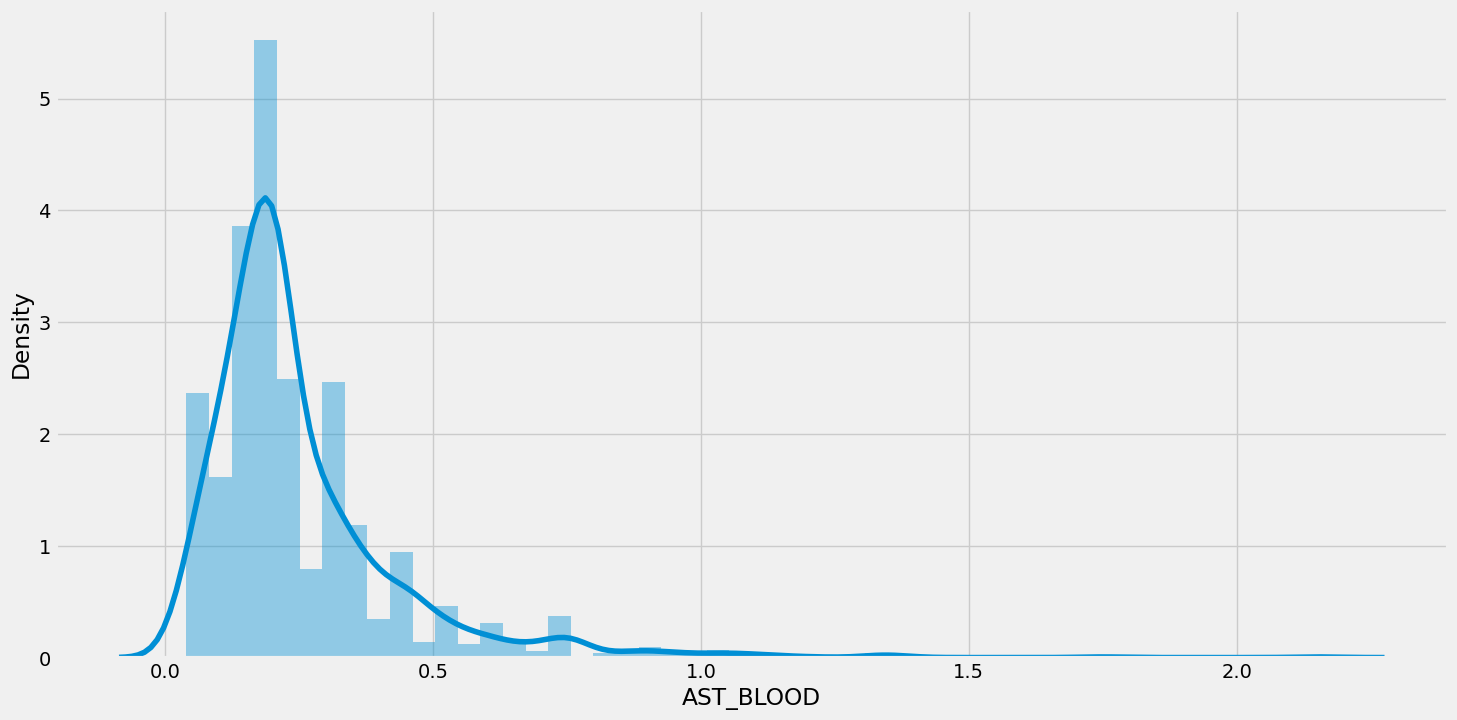

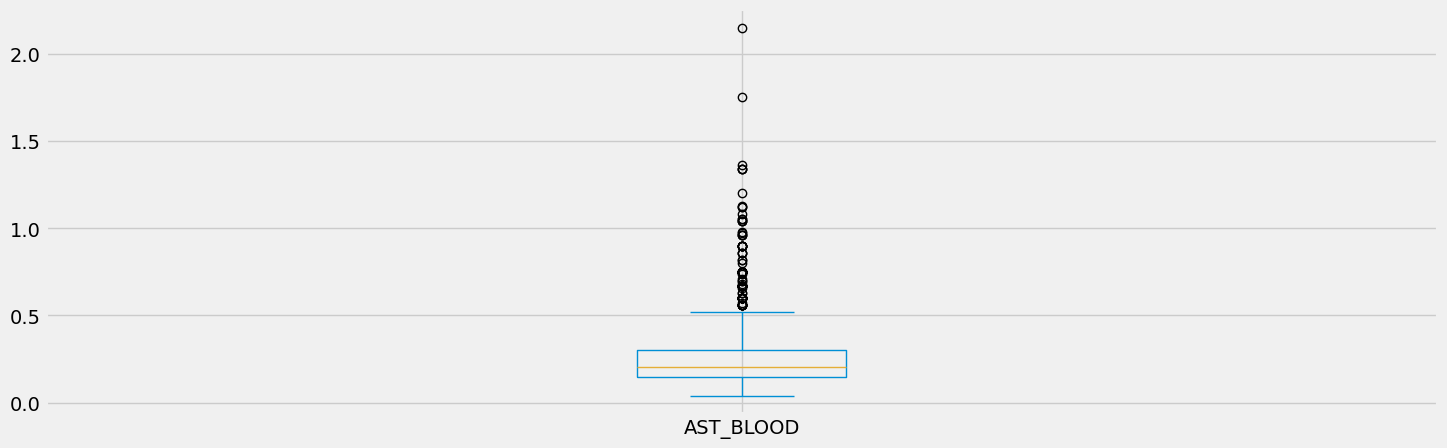

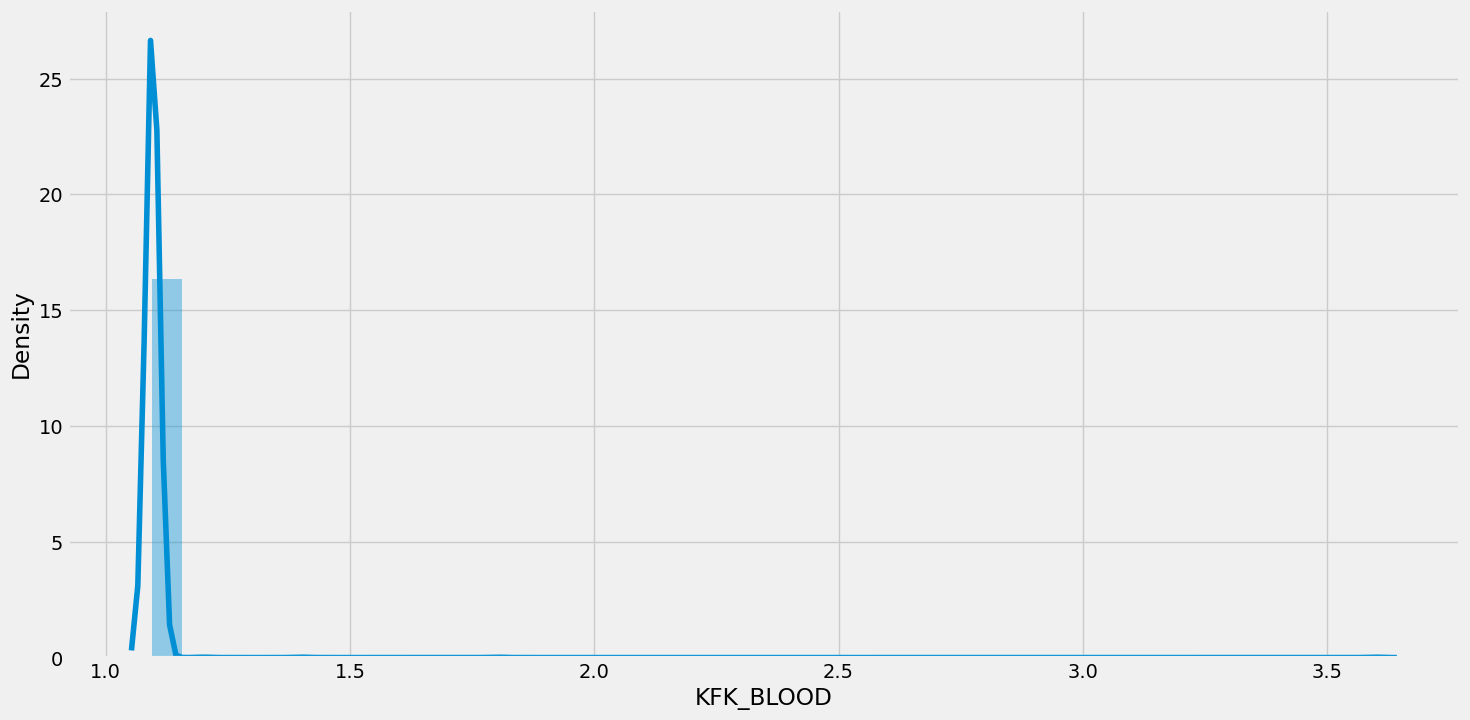

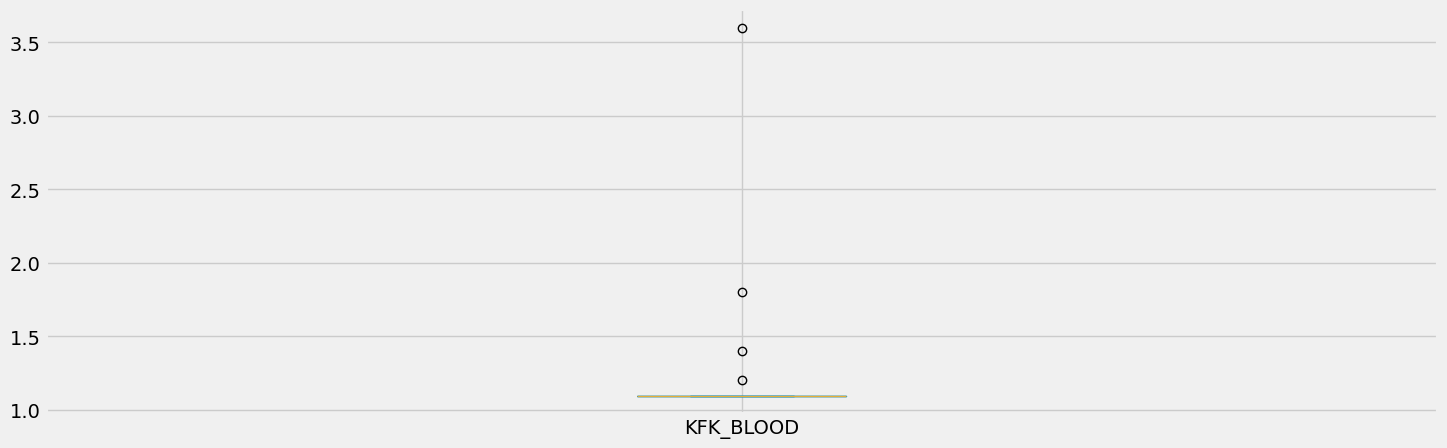

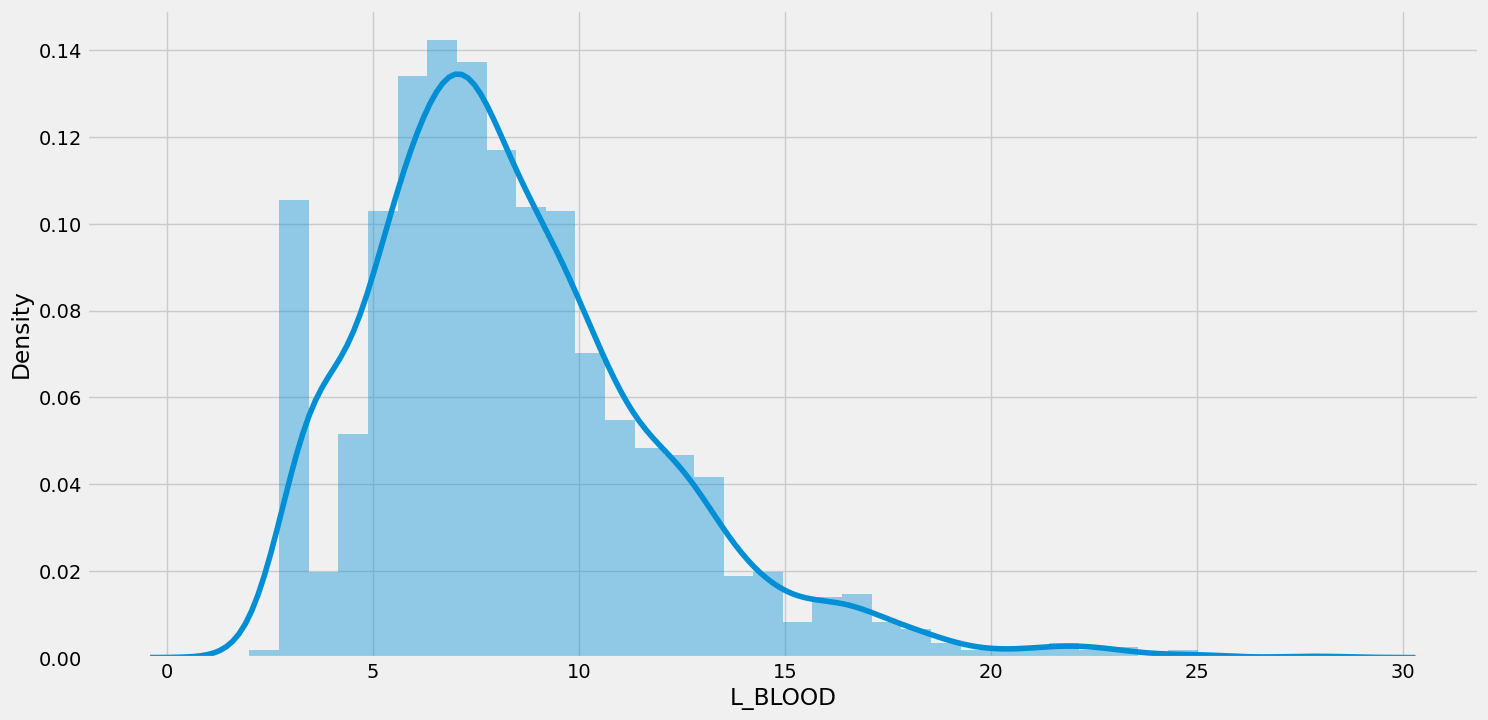

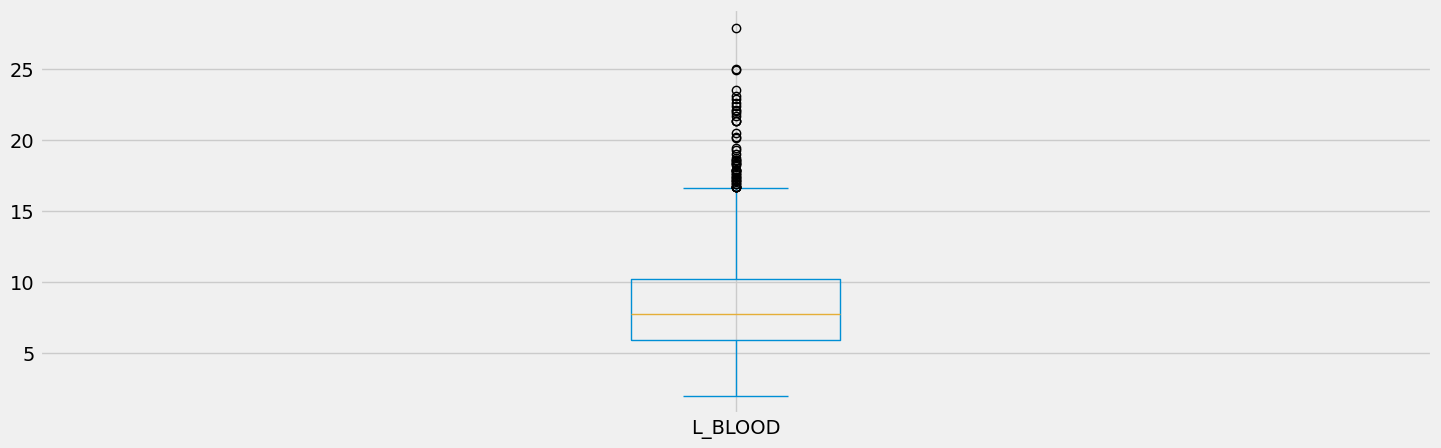

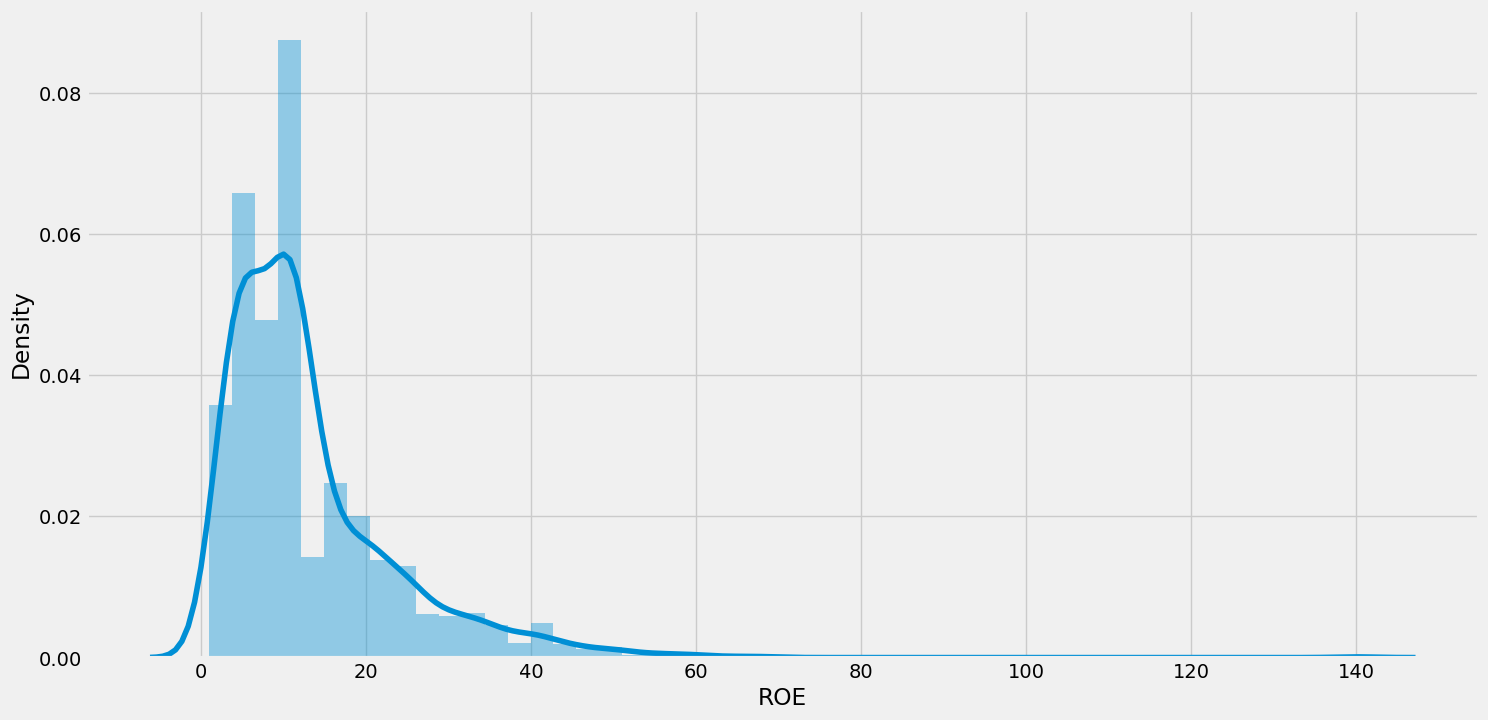

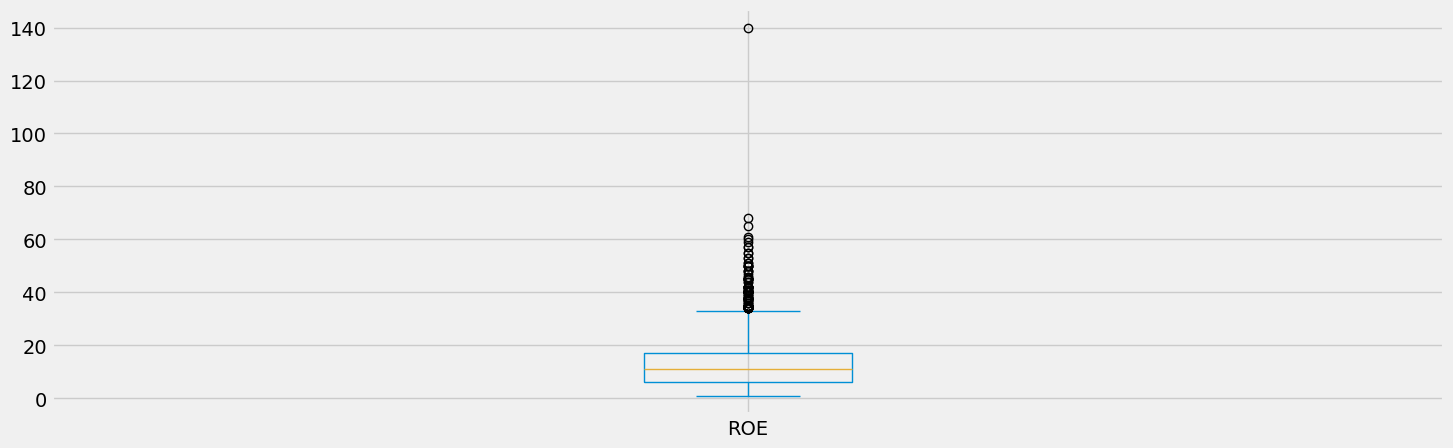

In [33]:
sns.distplot(df1['AGE'])
plt.show()
df1['AGE'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['K_BLOOD'])
plt.show()
df1['K_BLOOD'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['ALT_BLOOD'])
plt.show()
df1['ALT_BLOOD'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['AST_BLOOD'])
plt.show()
df1['AST_BLOOD'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['KFK_BLOOD'])
plt.show()
df1['KFK_BLOOD'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['L_BLOOD'])
plt.show()
df1['L_BLOOD'].plot.box(figsize=(16,5))
plt.show()
sns.distplot(df1['ROE'])
plt.show()
df1['ROE'].plot.box(figsize=(16,5))
plt.show()


# Bivariate Analysis
Categorical Independent Variable vs Target Variable

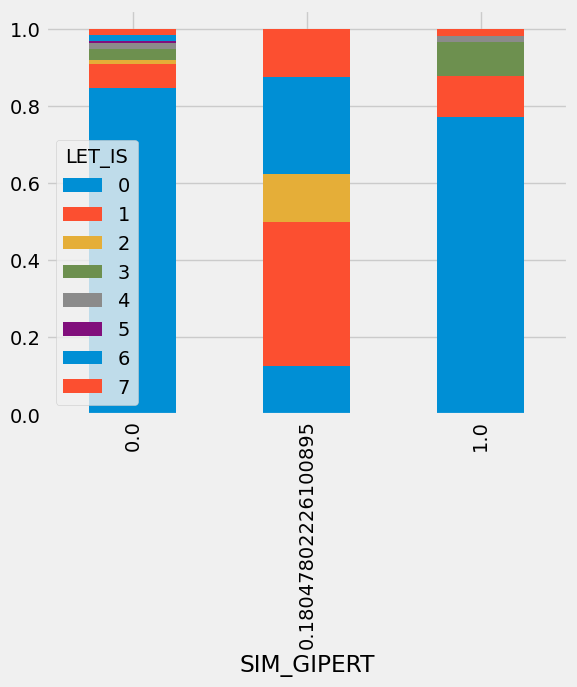

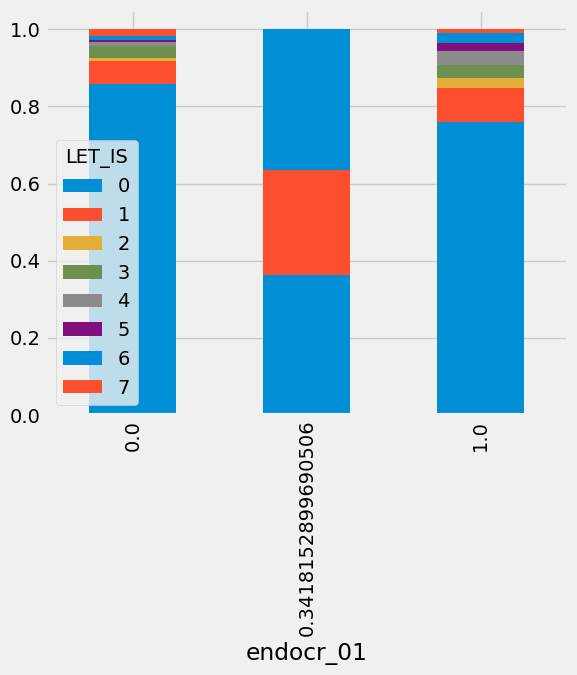

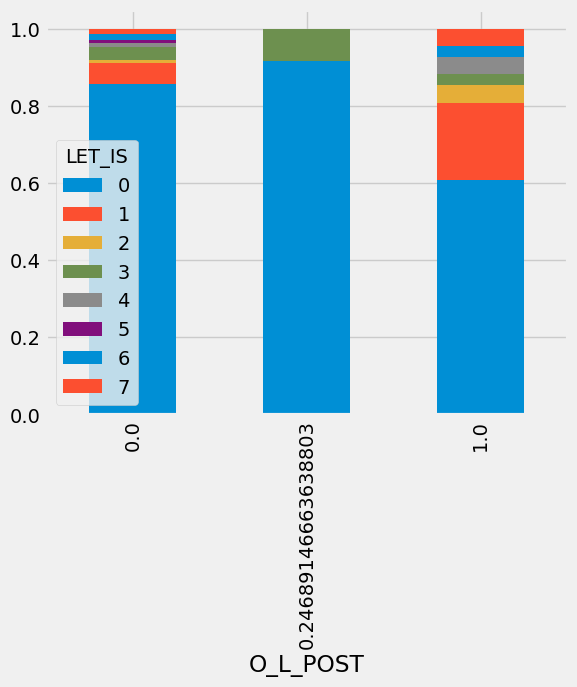

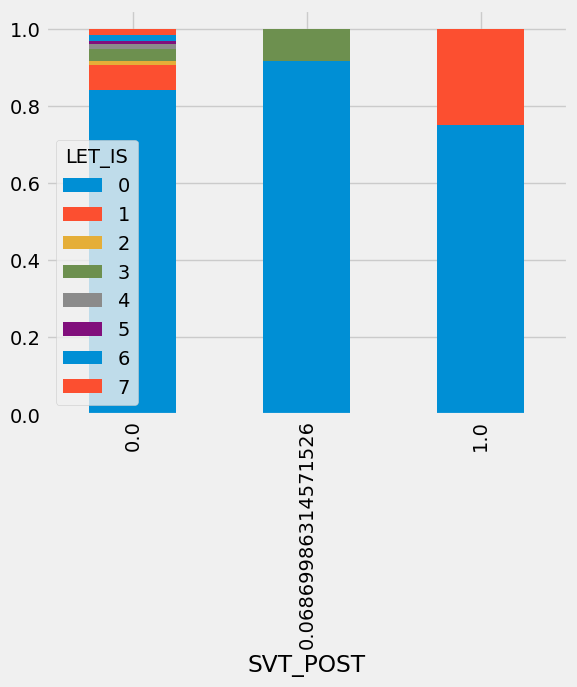

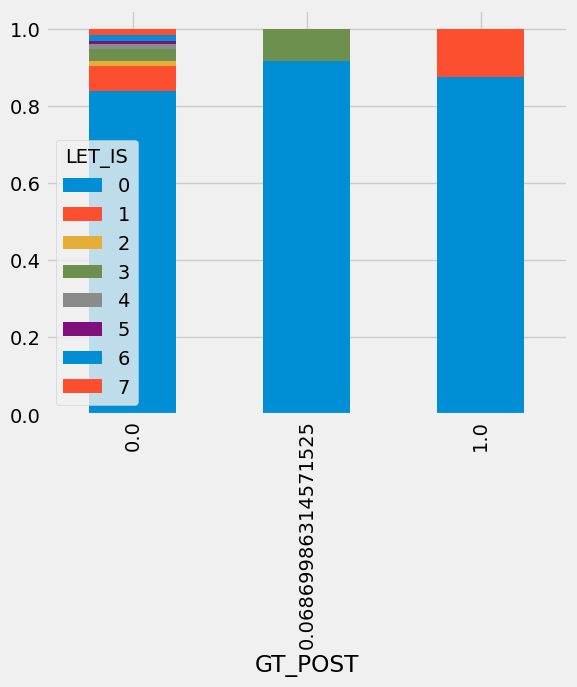

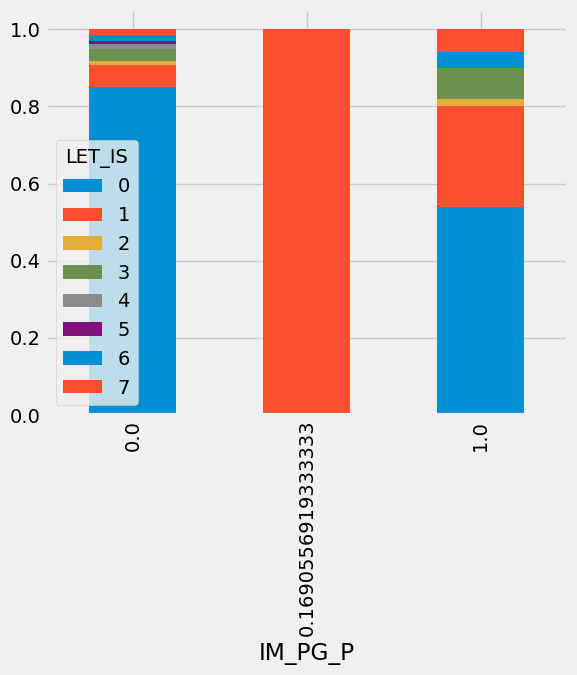

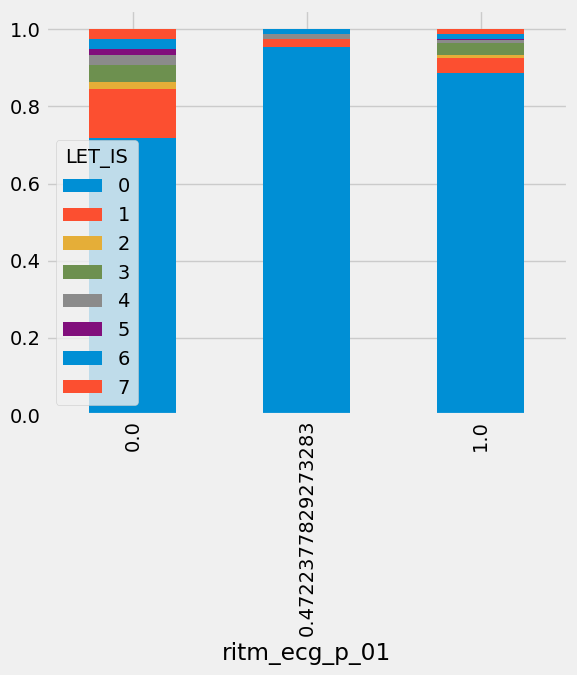

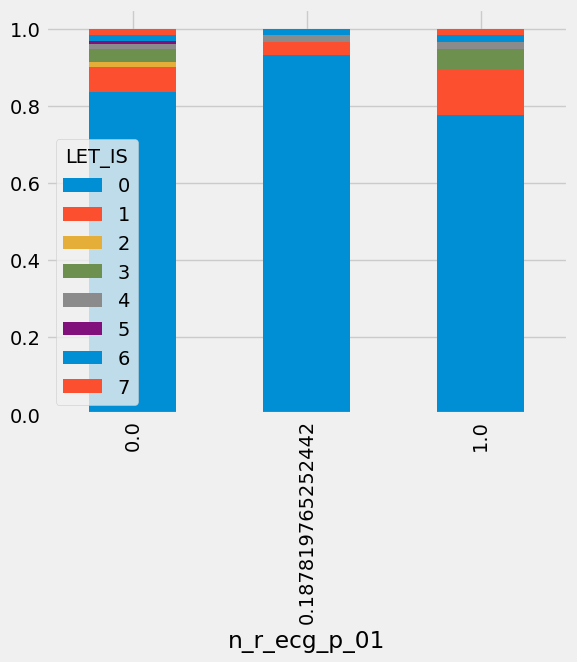

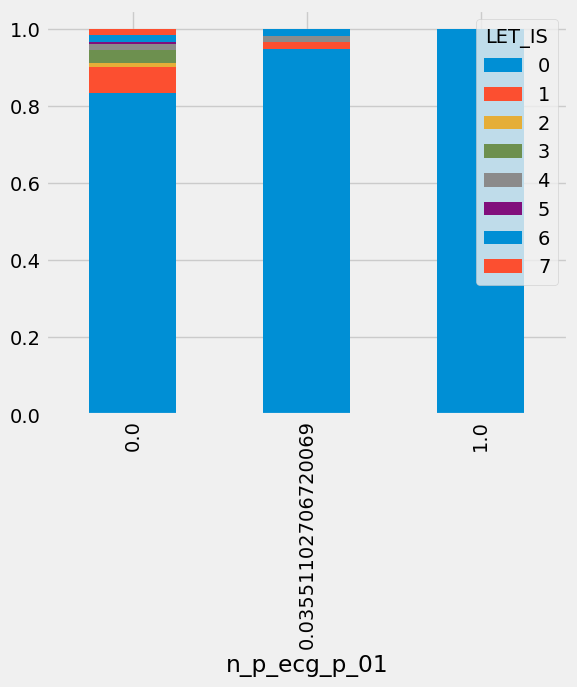

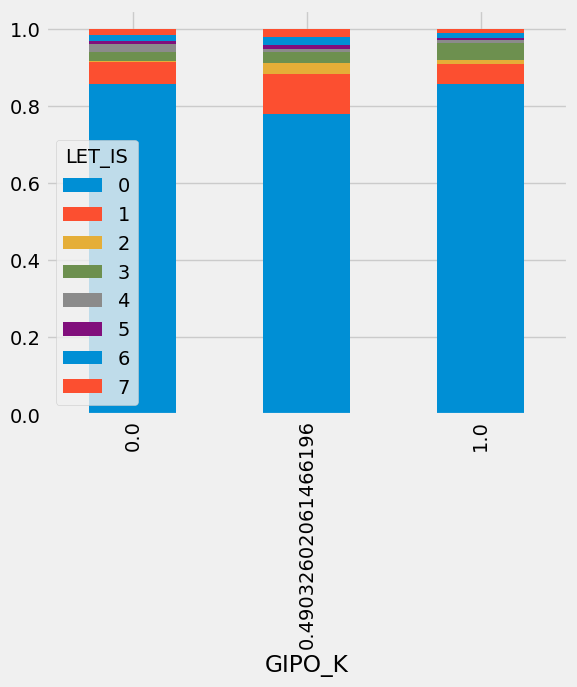

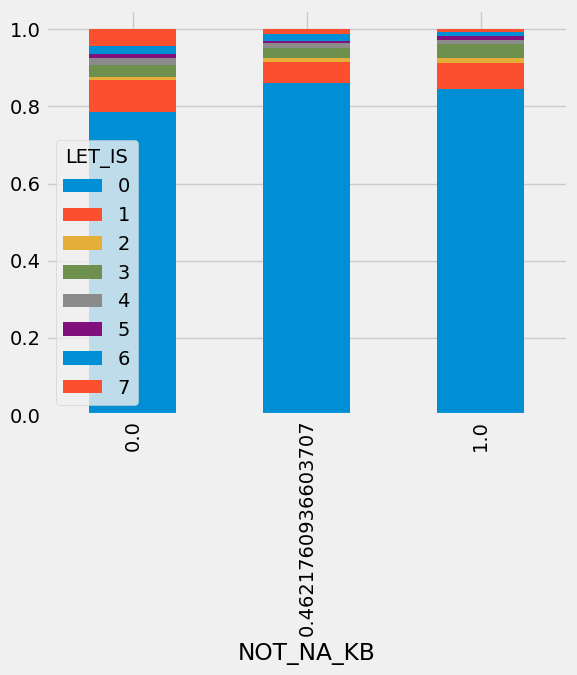

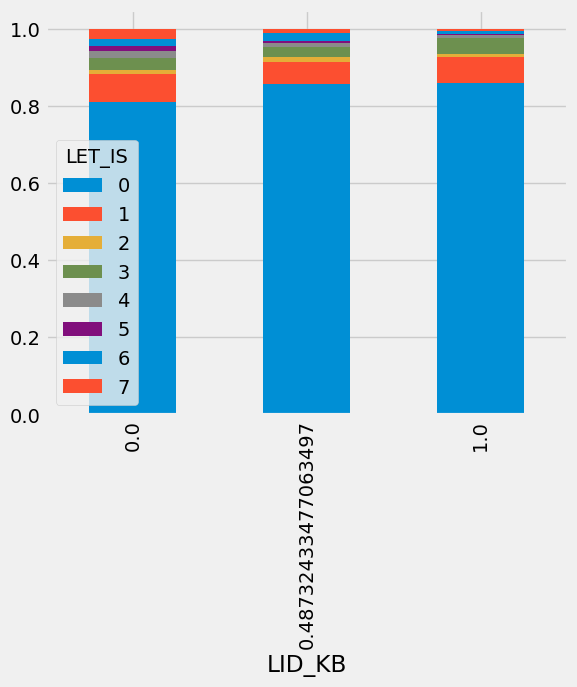

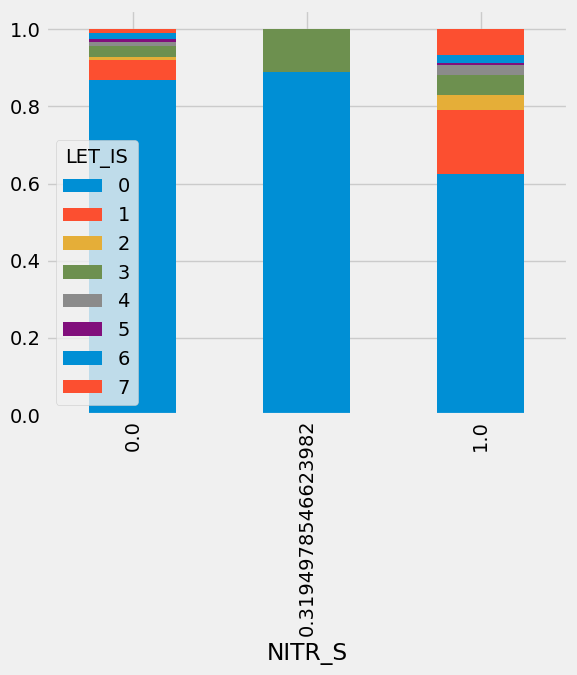

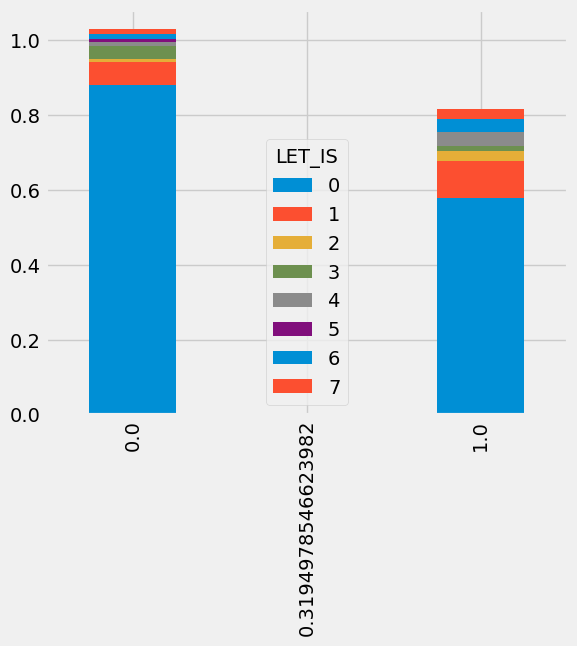

In [34]:
SIM_GIPERT=pd.crosstab(df1['SIM_GIPERT'],df1['LET_IS'])
SIM_GIPERT.div(SIM_GIPERT.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
endocr_01=pd.crosstab(df1['endocr_01'],df1['LET_IS'])
endocr_01.div(endocr_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
O_L_POST=pd.crosstab(df1['O_L_POST'],df1['LET_IS'])
O_L_POST.div(O_L_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
SVT_POST=pd.crosstab(df1['SVT_POST'],df1['LET_IS'])
SVT_POST.div(SVT_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
GT_POST=pd.crosstab(df1['GT_POST'],df1['LET_IS'])
GT_POST.div(GT_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
IM_PG_P=pd.crosstab(df1['IM_PG_P'],df1['LET_IS'])
IM_PG_P.div(IM_PG_P.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
ritm_ecg_p_01=pd.crosstab(df1['ritm_ecg_p_01'],df1['LET_IS'])
ritm_ecg_p_01.div(ritm_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
n_r_ecg_p_01=pd.crosstab(df1['n_r_ecg_p_01'],df1['LET_IS'])
n_r_ecg_p_01.div(n_r_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
n_p_ecg_p_01=pd.crosstab(df1['n_p_ecg_p_01'],df1['LET_IS'])
n_p_ecg_p_01.div(n_p_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
GIPO_K=pd.crosstab(df1['GIPO_K'],df1['LET_IS'])
GIPO_K.div(GIPO_K.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
NOT_NA_KB=pd.crosstab(df1['NOT_NA_KB'],df1['LET_IS'])
NOT_NA_KB.div(NOT_NA_KB.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
LID_KB=pd.crosstab(df1['LID_KB'],df1['LET_IS'])
LID_KB.div(LID_KB.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
NITR_S=pd.crosstab(df1['NITR_S'],df1['LET_IS'])
NITR_S.div(NITR_S.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()
REC_IM=pd.crosstab(df1['REC_IM'],df1['LET_IS'])
REC_IM.div(NITR_S.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

In [26]:
# Considering only numerical data 
df2 = df1.iloc[:,:122]
df2.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,0.48752,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.48752,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.48752,2.0,0.0,3.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,0.48752,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Converting into numpy array
df3=df2.values
df3

array([[77.,  1.,  2., ...,  0.,  0.,  0.],
       [55.,  1.,  1., ...,  0.,  0.,  0.],
       [52.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [55.,  1.,  3., ...,  0.,  1.,  0.],
       [79.,  0.,  2., ...,  0.,  0.,  0.],
       [63.,  1.,  2., ...,  0.,  0.,  0.]])

In [28]:
from sklearn.preprocessing import scale
# Normalizing the numerical data 
df4 = scale(df3)

In [29]:
X=df4
X

array([[ 1.30882812,  0.77216846,  1.72853164, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [-0.56322024,  0.77216846,  0.53190328, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [-0.81849956,  0.77216846, -0.66472509, ..., -0.54925817,
        -0.32121605, -0.30880548],
       ...,
       [-0.56322024,  0.77216846,  2.92516   , ..., -0.54925817,
         3.11316943, -0.30880548],
       [ 1.47901433, -1.29505419,  1.72853164, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [ 0.11752462,  0.77216846,  1.72853164, ..., -0.54925817,
        -0.32121605, -0.30880548]])

In [30]:
Y=df1['LET_IS'].values
Y

array([0, 0, 0, ..., 6, 1, 1], dtype=int64)

In [31]:
# Feature Importance with Decision Trees Classifier
from sklearn.tree import  DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[2.44420628e-02 2.04698924e-03 7.82242317e-04 4.77630823e-03
 2.12842366e-04 3.47959053e-03 0.00000000e+00 0.00000000e+00
 5.21678163e-03 1.18384211e-02 4.90073444e-02 0.00000000e+00
 0.00000000e+00 3.75281361e-03 1.87219763e-03 0.00000000e+00
 3.87204901e-03 0.00000000e+00 2.04698924e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.77513459e-03 6.99255006e-03 3.44314088e-03
 0.00000000e+00 4.27118861e-03 8.21934237e-03 0.00000000e+00
 0.00000000e+00 4.87302681e-03 3.54792723e-03 8.80471216e-03
 1.10996428e-02 0.00000000e+00 3.62418753e-03 0.00000000e+00
 1.29379251e-03 0.00000000e+00 1.23794111e-03 1.56699227e-02
 1.17542671e-02 5.25393905e-03 2.38325370e-03 5.33021457e-03
 4.09397848e-03 6.14096772e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.91492542e-03 1.03408571e-02 2.72931899e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.89750610e-03 0.000000

In [32]:
len(model.feature_importances_)

122

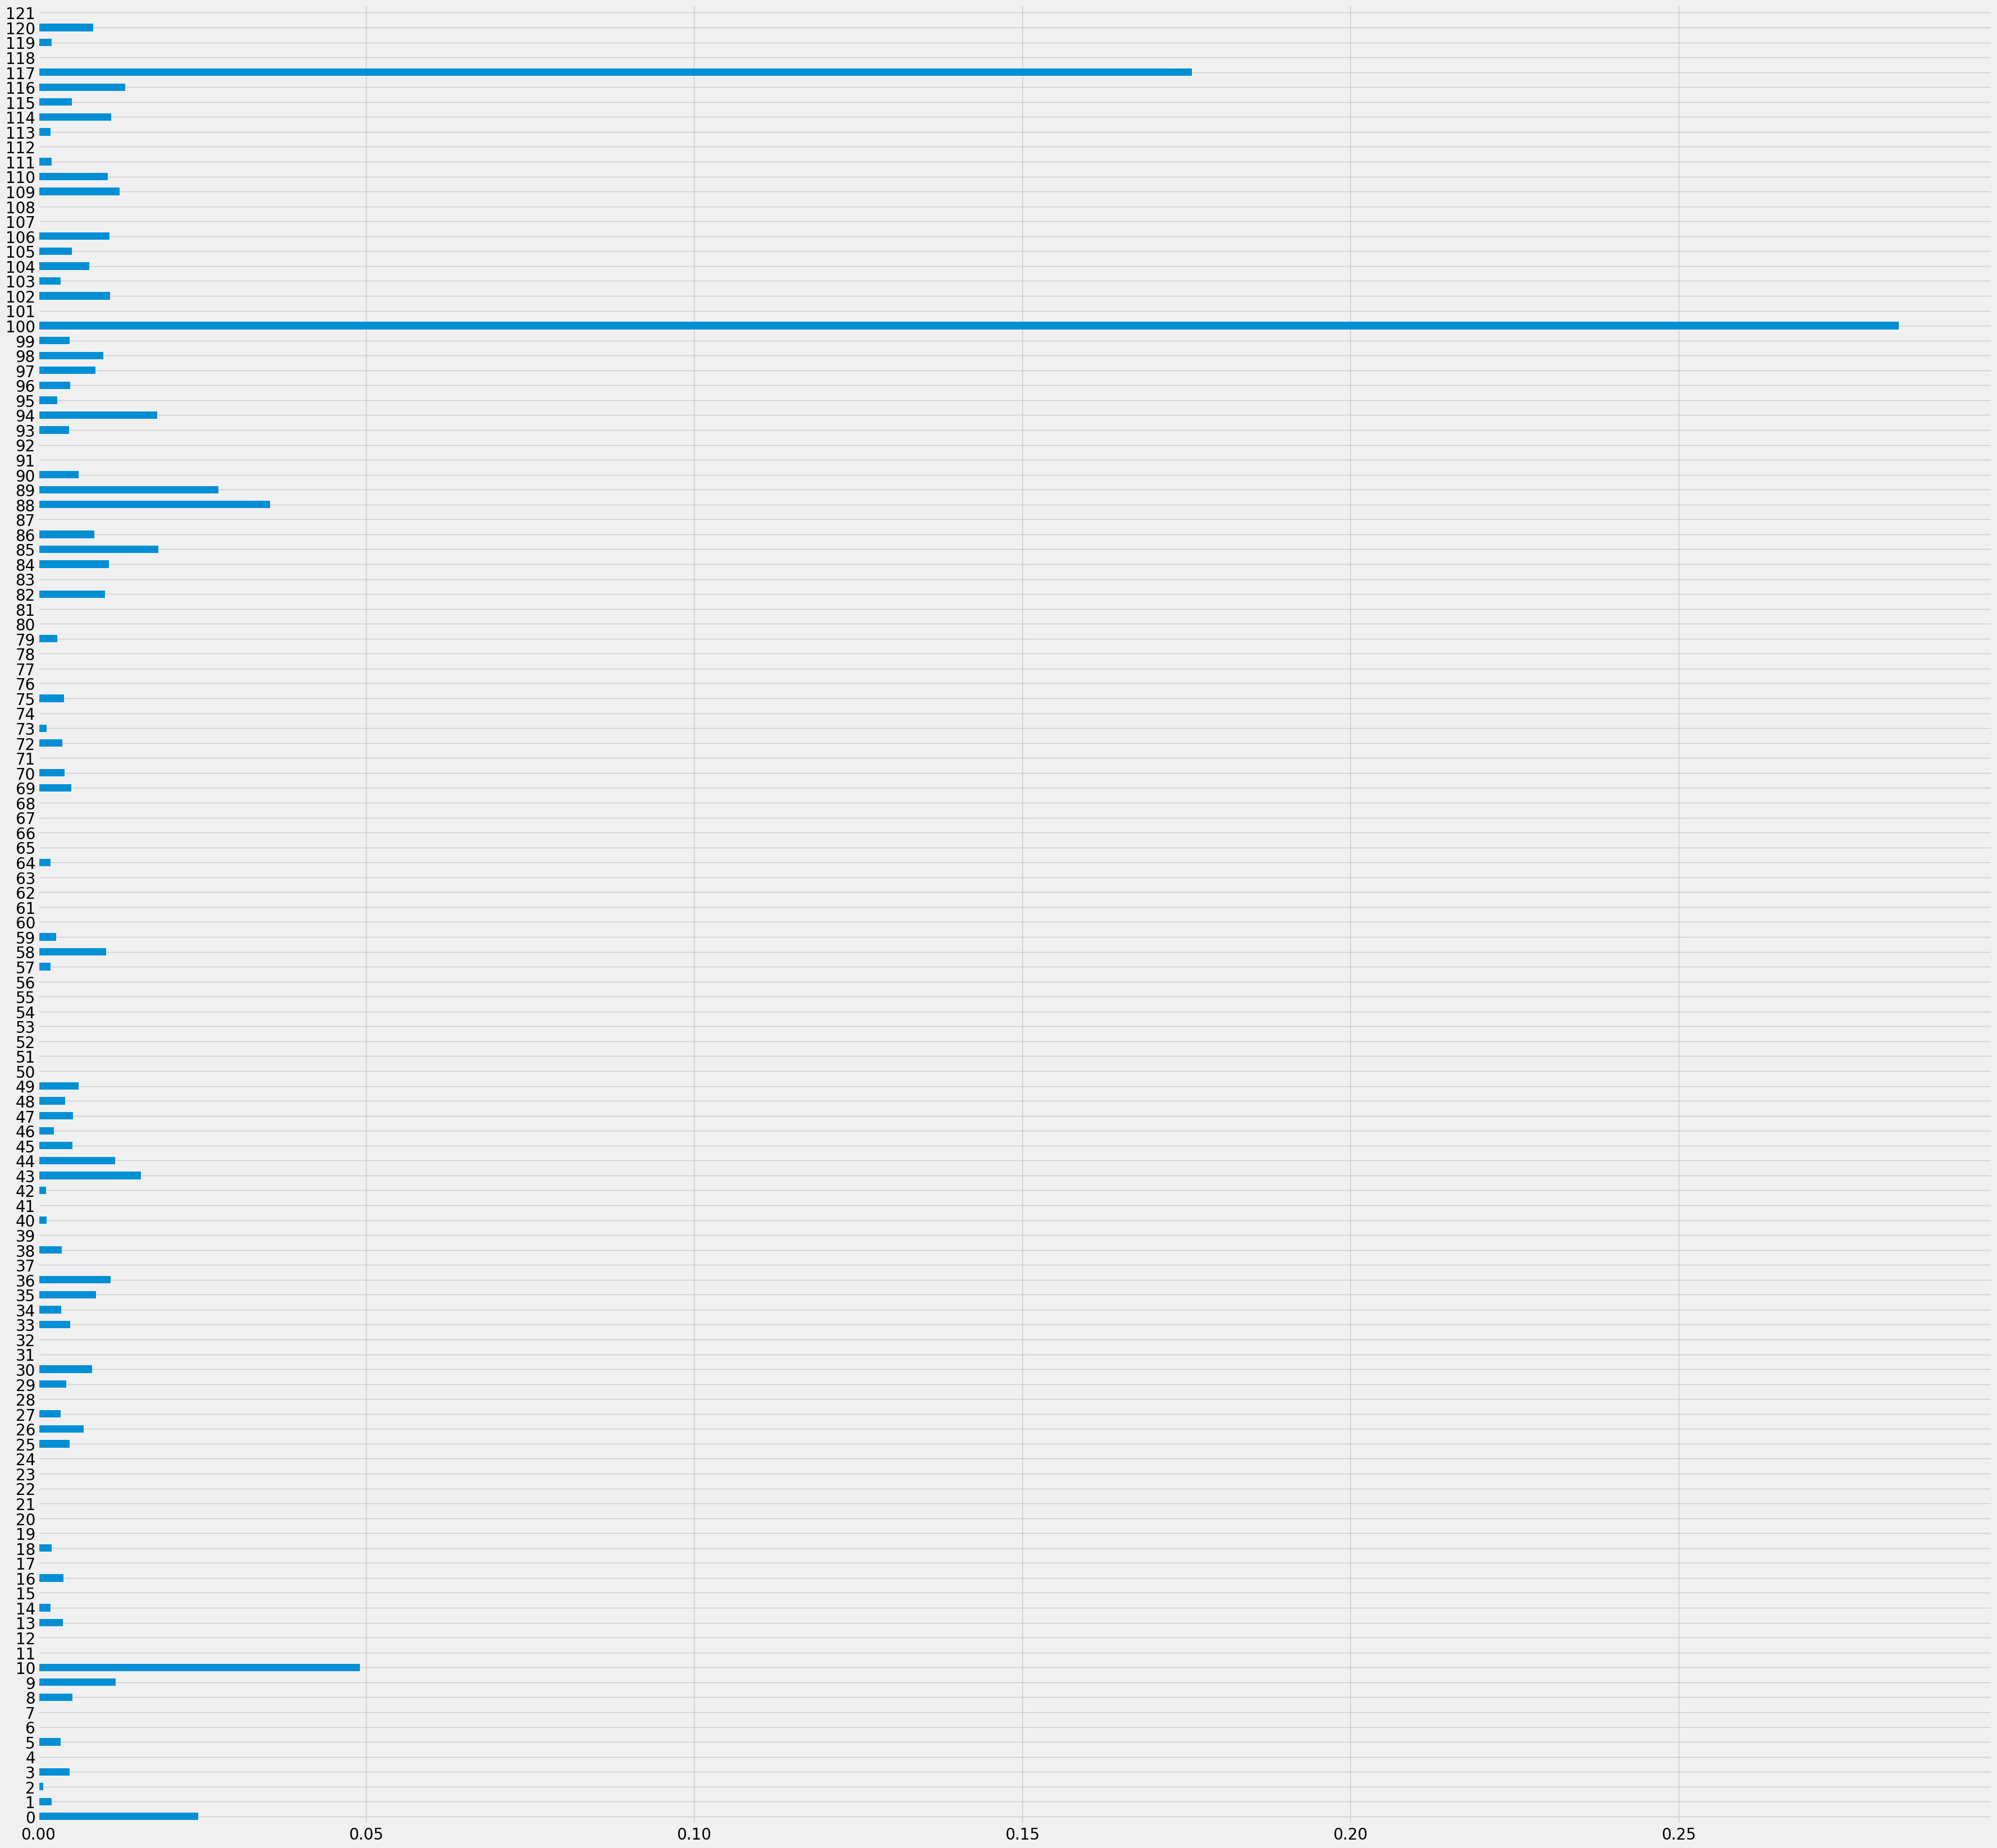

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize= (40 , 40))
ranked_features_dtc =pd.Series(model.feature_importances_ )
ranked_features_dtc.plot(kind='barh' , fontsize = 20)
plt.show()

In [34]:
DTreeclassifier_data = pd.DataFrame(model.feature_importances_ , columns=["Score"])
dfcolumns_dtc=pd.DataFrame(df2.columns)
dtc_features_rank=pd.concat([dfcolumns_dtc,DTreeclassifier_data],axis=1)
dtc_features_rank.columns=['DTC Features','Score']
dtc_features_rank

,DTC Features,Score
0,AGE,0.024442
1,SEX,0.002047
2,INF_ANAM,0.000782
3,STENOK_AN,0.004776
4,FK_STENOK,0.000213
...,...,...
117,RAZRIV,0.175823
118,DRESSLER,0.000000
119,ZSN,0.002047
120,REC_IM,0.008373


In [35]:
dtc_features_rank.mean()

Score    0.008197
dtype: float64

In [36]:
dtc_features_rank['DTC Features'][dtc_features_rank['Score'] > 0.008197]

0               AGE
9           DLIT_AG
10            ZSN_A
30       zab_leg_03
35        S_AD_ORIT
36        D_AD_ORIT
43           ant_im
44           lat_im
58     n_r_ecg_p_05
82          K_BLOOD
84         NA_BLOOD
85        ALT_BLOOD
86        AST_BLOOD
88          L_BLOOD
89              ROE
94            NA_KB
97           NITR_S
98         NA_R_1_n
100        NA_R_3_n
102      NOT_NA_2_n
106      ANT_CA_S_n
109        TIKL_S_n
110       TRENT_S_n
114      FIBR_JELUD
116       OTEK_LANC
117          RAZRIV
120          REC_IM
Name: DTC Features, dtype: object

These are the features getting by Decision Tree Classifier


In [37]:
DC_Data = df1[['AGE' ,'STENOK_AN' , 'FK_STENOK' ,'IBS_POST' ,'ZSN_A', 'nr_04' , 'S_AD_KBRIG' , 'D_AD_KBRIG',
'S_AD_ORIT' , 'D_AD_ORIT' , 'K_SH_POST' ,'ant_im' , 'lat_im' , 'ritm_ecg_p_07' , 'n_r_ecg_p_04' , 'n_p_ecg_p_10' , 
'n_p_ecg_p_12' ,'K_BLOOD' ,'NA_BLOOD' ,'ALT_BLOOD','AST_BLOOD' ,'L_BLOOD' , 'ROE' , 'TIME_B_S' , 'R_AB_1_n' , 'R_AB_3_n' 
,'NA_KB','NOT_NA_KB', 'NITR_S' , 'NA_R_1_n' , 'GEPAR_S_n' ,'RAZRIV' ,'DRESSLER' ,'ZSN','REC_IM','LET_IS']]
DC_Data

,AGE,STENOK_AN,FK_STENOK,IBS_POST,ZSN_A,nr_04,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,...,NA_KB,NOT_NA_KB,NITR_S,NA_R_1_n,GEPAR_S_n,RAZRIV,DRESSLER,ZSN,REC_IM,LET_IS
0,77.0,1.000000,1.000000,2.0000,0.000000,0.0,34.997835,19.745045,180.0,100.0,...,0.491601,0.462176,0.0,0.0,1.0,0,0,0,0,0
1,55.0,0.000000,0.000000,0.0000,0.000000,0.0,34.997835,19.745045,120.0,90.0,...,1.000000,0.000000,0.0,0.0,1.0,0,0,0,0,0
2,52.0,0.000000,0.000000,2.0000,0.000000,0.0,150.000000,100.000000,180.0,100.0,...,1.000000,1.000000,0.0,1.0,1.0,0,0,0,0,0
3,68.0,0.000000,0.000000,2.0000,1.000000,0.0,34.997835,19.745045,120.0,70.0,...,0.491601,0.462176,0.0,0.0,1.0,0,0,1,0,0
4,60.0,0.000000,0.000000,2.0000,0.000000,0.0,190.000000,100.000000,160.0,90.0,...,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.000000,2.000000,1.0000,0.000000,0.0,34.997835,19.745045,110.0,70.0,...,1.000000,1.000000,0.0,0.0,0.0,1,0,0,0,3
1696,70.0,6.000000,2.000000,1.0000,0.000000,0.0,34.997835,19.745045,50.0,0.0,...,1.000000,0.462176,0.0,0.0,0.0,0,0,0,0,1
1697,55.0,6.000000,2.000000,2.0000,0.000000,0.0,34.997835,19.745045,70.0,50.0,...,0.491601,0.462176,1.0,2.0,1.0,0,0,0,1,6
1698,79.0,2.000000,2.000000,1.0000,0.658722,1.0,34.997835,19.745045,110.0,70.0,...,1.000000,0.000000,1.0,2.0,1.0,0,0,0,0,1


In [38]:
array = DC_Data.values
X1 = array[:,0:35]
Y1 = array[:,35]

In [39]:
    from sklearn.model_selection  import  train_test_split
    x_train , x_test , y_train , y_test = train_test_split(X1 , Y1 , test_size = 0.25, random_state = 0)

In [40]:
import imblearn
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.3)
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
from collections import Counter
counter = Counter(Y_train)
print(counter)

Counter({0: 1001, 3: 1001, 1: 1001, 6: 1001, 4: 1001, 7: 1001, 5: 1001, 2: 1001})


In [41]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.decomposition import PCA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.3)
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)
pcaxtrain=pd.DataFrame(X_train_pca)
pcaxtest=pd.DataFrame(X_test_pca)

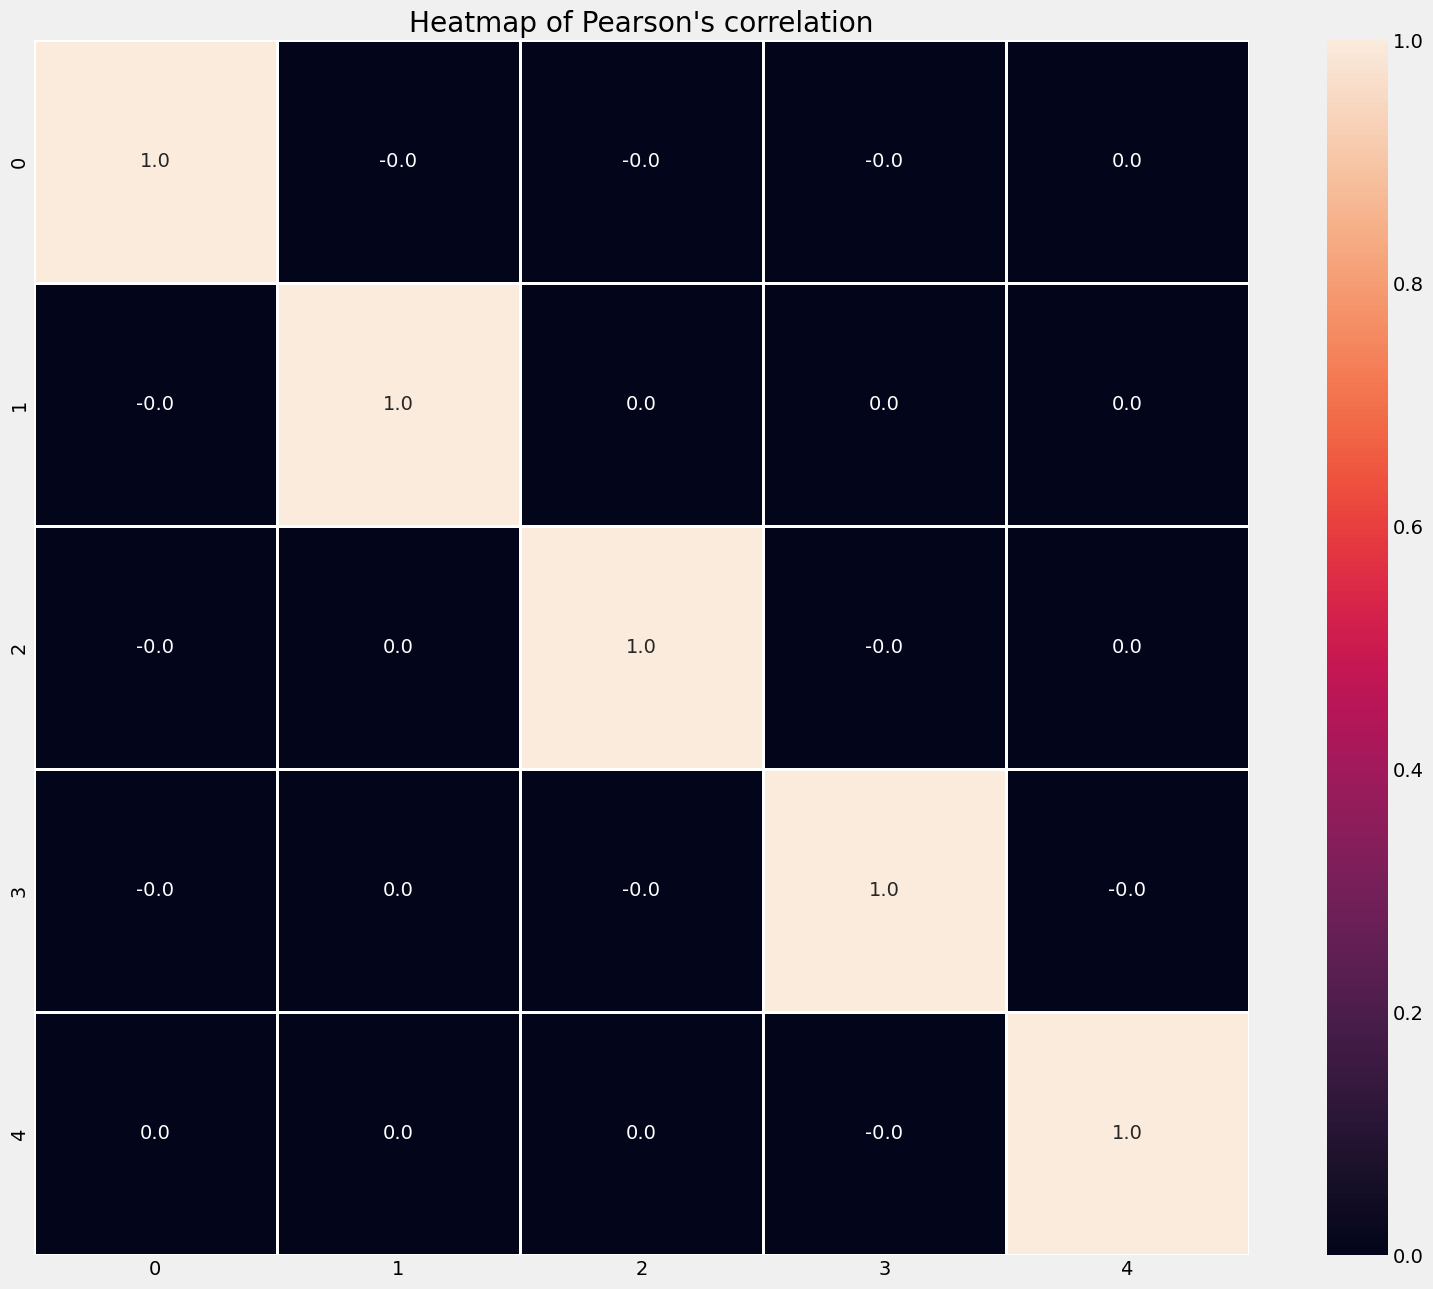

In [45]:
pcaxtrainfinal = pcaxtrain.corr(method = 'pearson')
fig3, ax3 = plt.subplots(figsize = (18,15))
ax3.set_title("Heatmap of Pearson's correlation")
ax3 = sns.heatmap(pcaxtrainfinal, linewidths = 1, annot = True, fmt = '.1f', square = True)

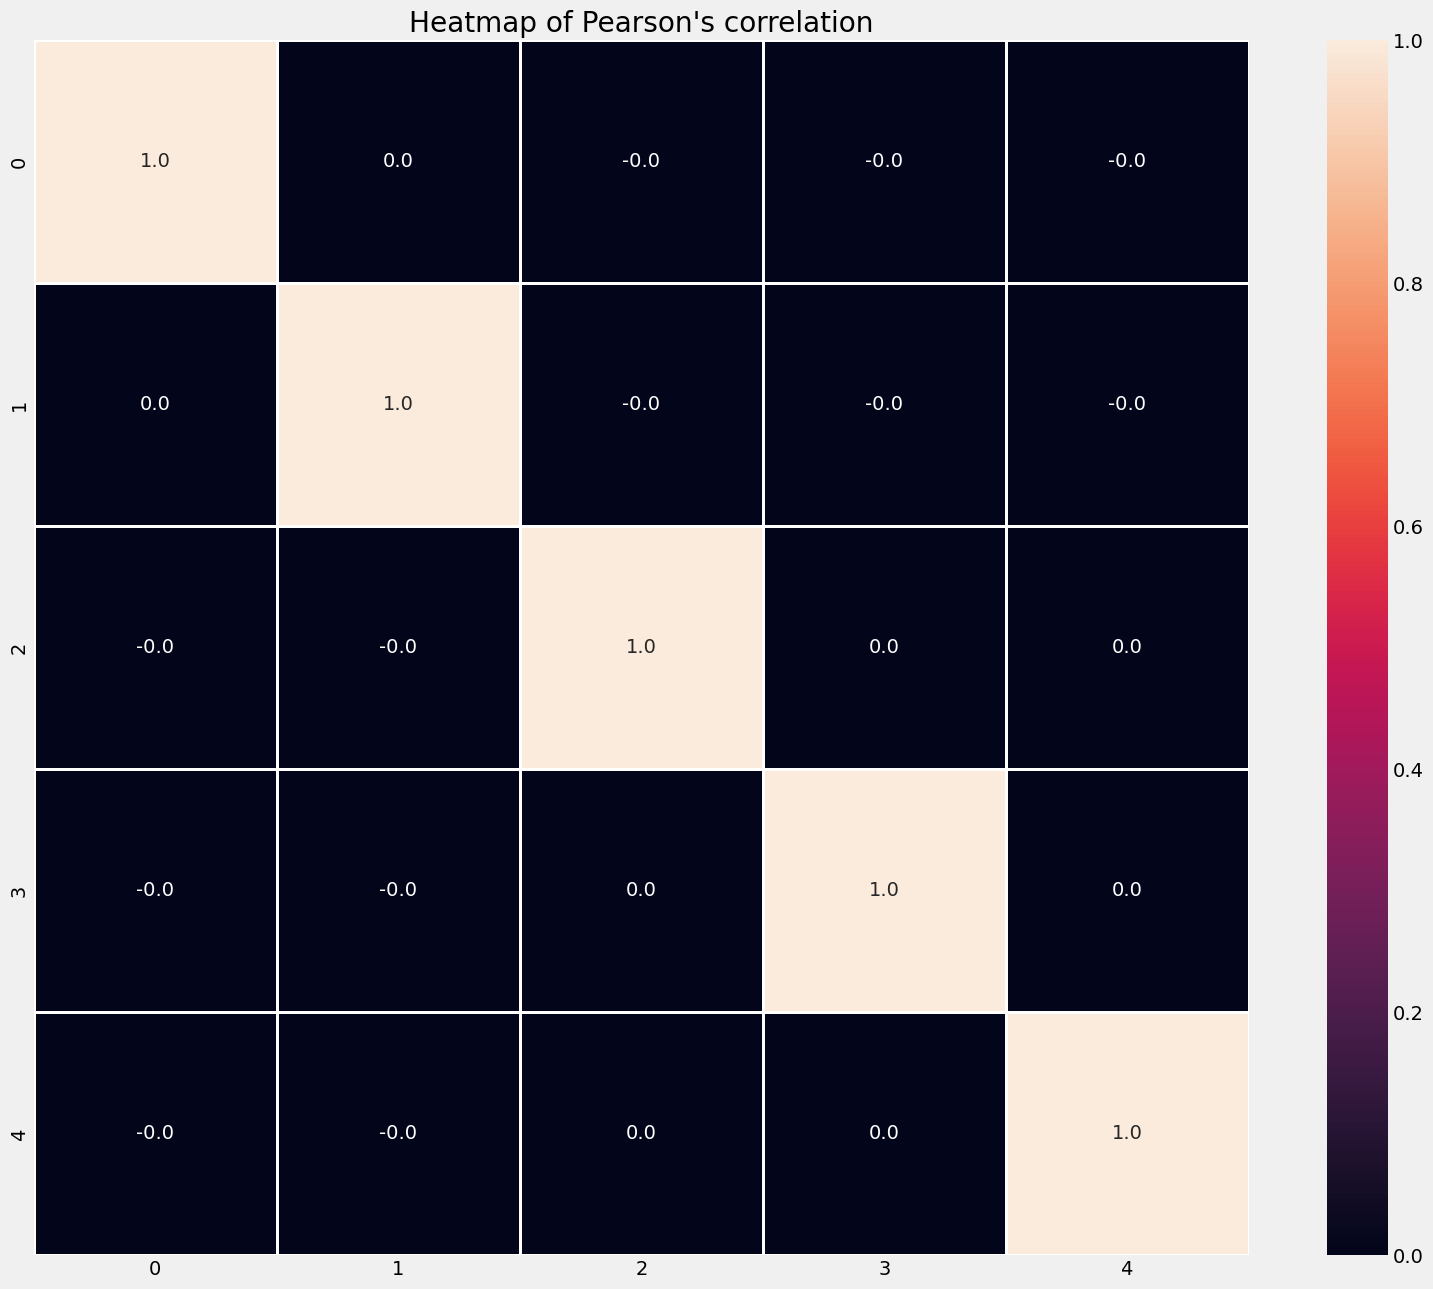

In [46]:
pcaxtestfinal = pcaxtest.corr(method = 'pearson')
fig3, ax3 = plt.subplots(figsize = (18,15))
ax3.set_title("Heatmap of Pearson's correlation")
ax3 = sns.heatmap(pcaxtestfinal, linewidths = 1, annot = True, fmt = '.1f', square = True)

# 1. Logistic Regression


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state = 5)
results_log = cross_val_score(model_log, x_train, y_train, cv=10)
print(results_log.mean())

0.8376783956692913


In [48]:
model_log.fit(x_train , y_train)

LogisticRegression(random_state=5)

In [49]:
y_pred_log_test  = model_log.predict(x_test)
y_pred_log_train = model_log.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

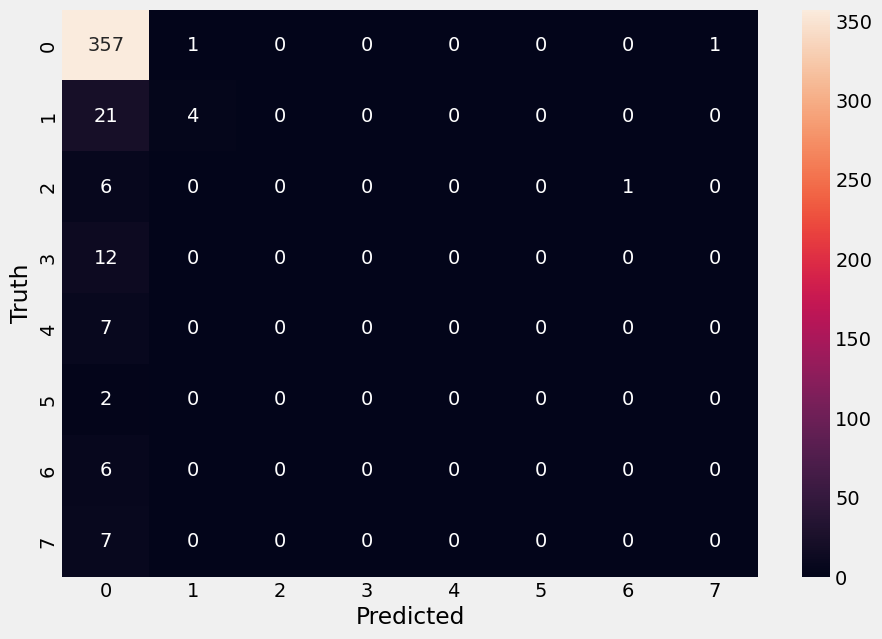

In [50]:
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test , y_pred_log_test)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.58333333333333, 0.5, 'Truth')

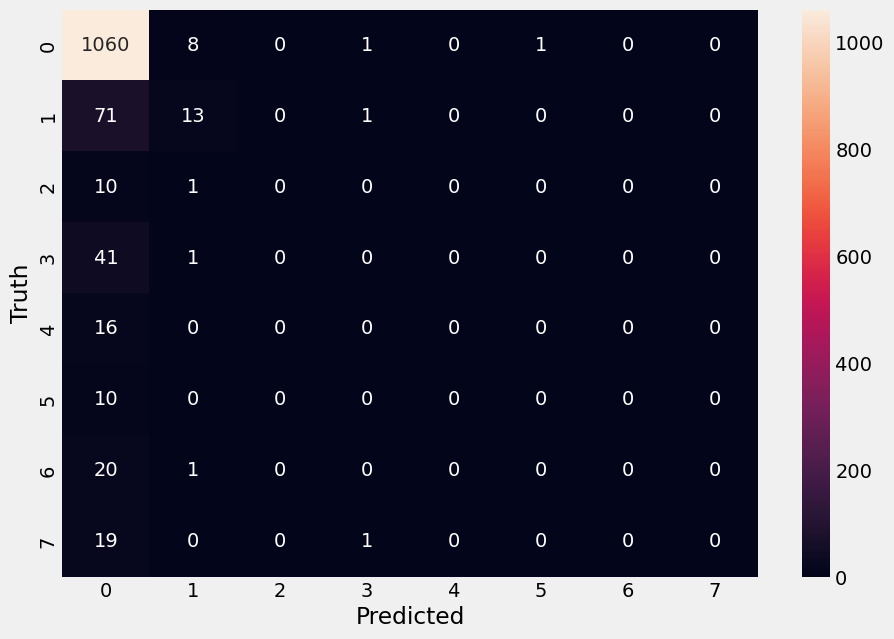

In [51]:
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_train , y_pred_log_train)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
print(accuracy_score(y_test , y_pred_log_test))
print(accuracy_score(y_train , y_pred_log_train))

0.8494117647058823
0.8415686274509804


In [54]:
from imblearn.under_sampling import NearMiss
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.3)
undersample = NearMiss(version=3, n_neighbors_ver3=3)
X_train, Y_train = undersample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 11, 1: 11, 2: 11, 3: 11, 5: 11, 7: 10, 4: 9, 6: 9})


# 2. Bagging Classifier


In [55]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
model_bc = BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=8)
results_bc = cross_val_score(model_bc, x_train, y_train, cv=10)
print(results_bc.mean())

0.9137426181102363


In [56]:
model_bc.fit(x_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=8)

In [57]:
#Predict for X test dataset
y_pred_bc = model_bc.predict(x_test)
y_pred_bc_train = model_bc.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

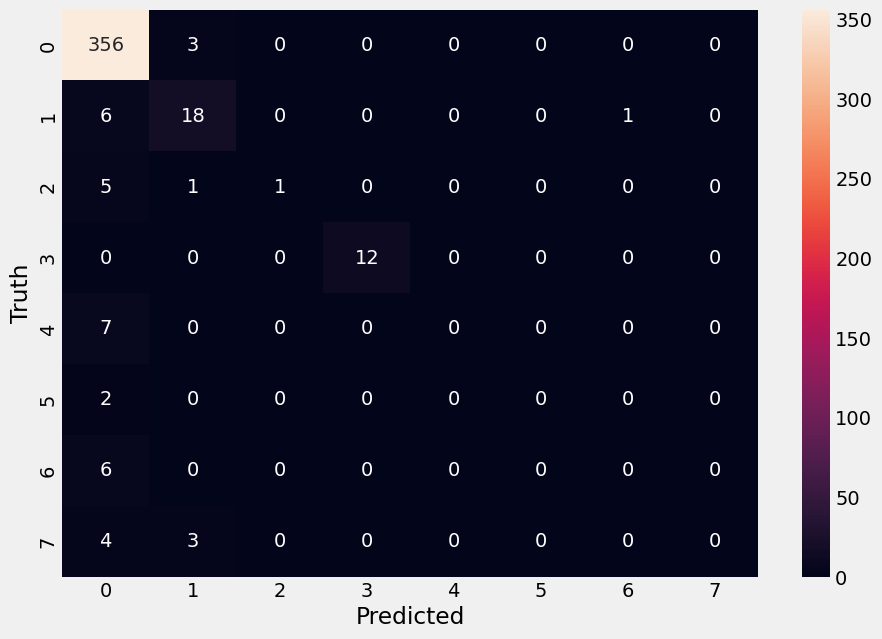

In [58]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_bc = confusion_matrix(y_test,y_pred_bc)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_bc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
print(accuracy_score(y_test , y_pred_bc))
print(accuracy_score(y_train , y_pred_bc_train))

0.9105882352941177
0.9874509803921568


# 3. Random Forest Classification


In [60]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
num_trees = 50
model_rf = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
results_rf = cross_val_score(model_rf, x_train, y_train, cv=10)
print(results_rf.mean())

0.9082369586614174


In [61]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [62]:
#Predict for X dataset
y_pred_rf = model_rf.predict(x_test)
y_pred_rf_train = model_rf.predict(x_train)

# Oversampling + PCA


Text(50.58333333333333, 0.5, 'Truth')

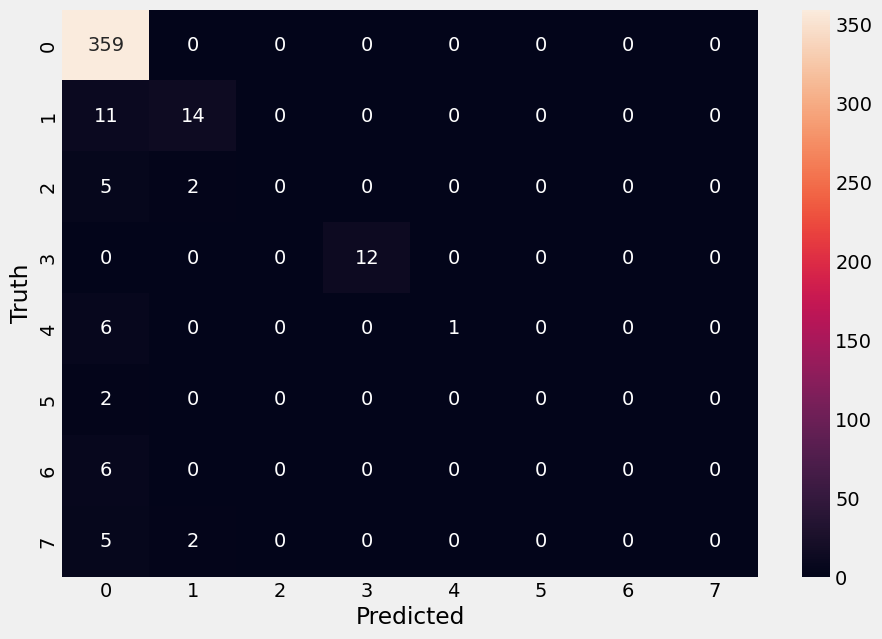

In [63]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
print(accuracy_score(y_test , y_pred_rf))
print(accuracy_score(y_train , y_pred_rf_train))

0.908235294117647
1.0


In [65]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       359
         1.0       0.78      0.56      0.65        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      1.00      1.00        12
         4.0       1.00      0.14      0.25         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.91       425
   macro avg       0.46      0.34      0.36       425
weighted avg       0.86      0.91      0.88       425



# 4. KNeighbors Classifier


In [66]:
#KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
kfold = KFold(n_splits=10)
model_knn = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2)
results = cross_val_score(model_knn, x_train, y_train, cv=kfold)
print(results.mean())

0.8407849409448819


In [67]:
model_knn.fit(x_train , y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn  = model_knn.predict(x_test)
y_pred_knn_train = model_knn.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

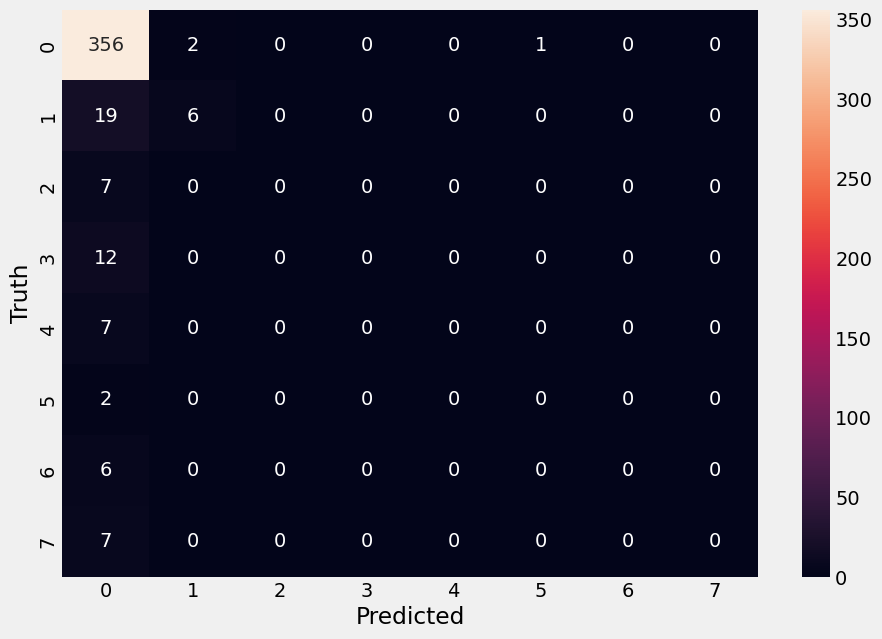

In [69]:
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_knn = confusion_matrix(y_test , y_pred_knn)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
print(accuracy_score(y_test , y_pred_knn))
print(accuracy_score(y_train , y_pred_knn_train))

0.851764705882353
0.851764705882353


In [71]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       359
         1.0       0.75      0.24      0.36        25
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.85       425
   macro avg       0.20      0.15      0.16       425
weighted avg       0.77      0.85      0.80       425



# 5. AdaBoost Classification


In [72]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model_adbc = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model_adbc, x_train, y_train, cv=kfold)
print(results.mean())

0.857978592519685


In [73]:
model_adbc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [74]:
#Predict for X dataset
y_pred_adbc = model_adbc.predict(x_test)
y_pred_adabc_train = model_adbc.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

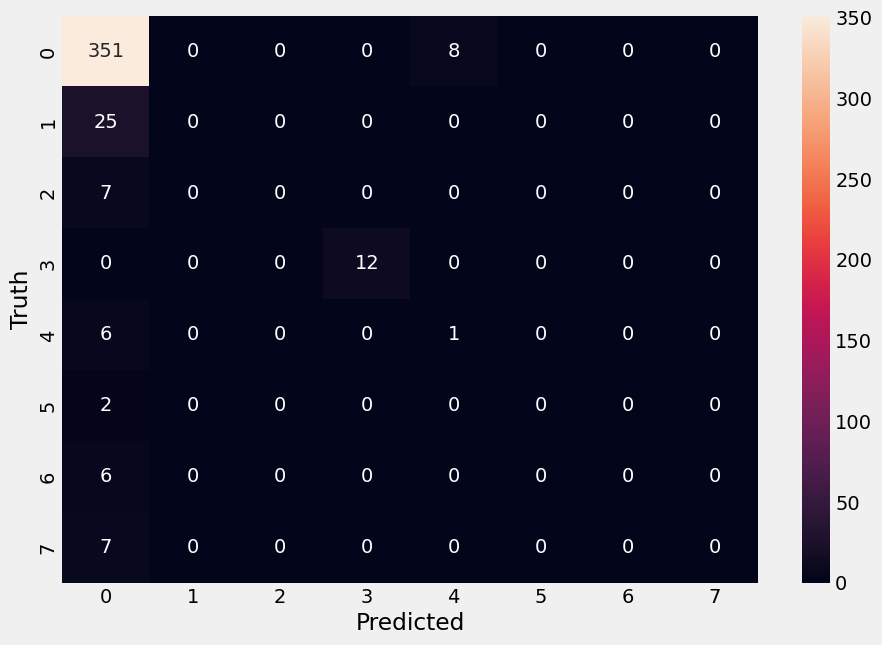

In [75]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_adbc = confusion_matrix(y_test,y_pred_adbc)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_adbc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
print(accuracy_score(y_test , y_pred_adbc))
print(accuracy_score(y_train , y_pred_adabc_train))

0.8564705882352941
0.8572549019607844


In [77]:
#Classification report
print(classification_report(y_test , y_pred_adbc))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       359
         1.0       0.00      0.00      0.00        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      1.00      1.00        12
         4.0       0.11      0.14      0.12         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.86       425
   macro avg       0.25      0.27      0.26       425
weighted avg       0.76      0.86      0.81       425



# 6. Stacking Ensemble Classification

In [78]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
results = cross_val_score(model_ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.8839136318897637


In [79]:
model_ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=500)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [80]:
#Predict for X dataset
y_pred_ensemble = model_ensemble.predict(x_test)
y_pred_ensemble_train = model_ensemble.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

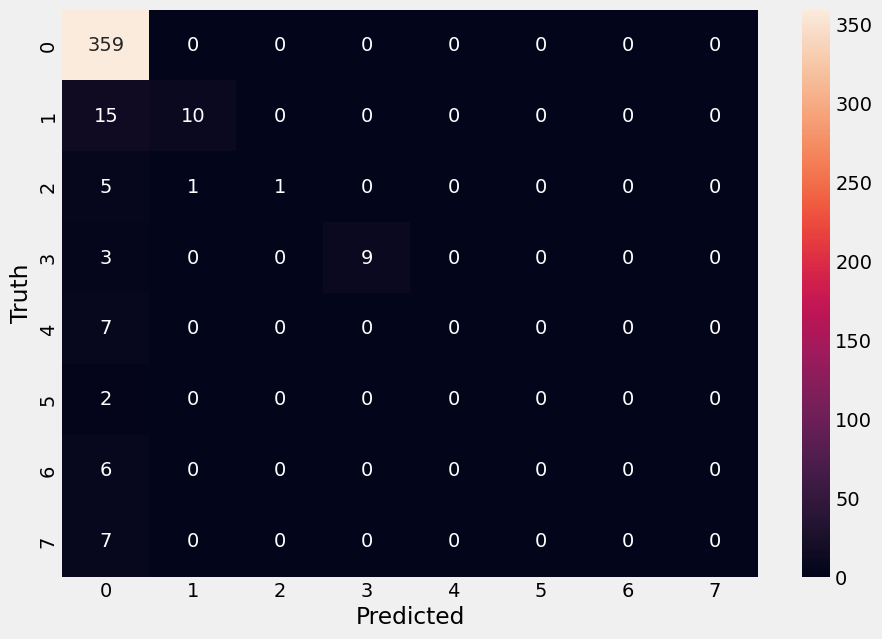

In [81]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_ensemble = confusion_matrix(y_test,y_pred_ensemble)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
print(accuracy_score(y_test , y_pred_ensemble))
print(accuracy_score(y_train , y_pred_ensemble_train))

0.8917647058823529
0.908235294117647


In [83]:
#Classification report
print(classification_report(y_test , y_pred_ensemble))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       359
         1.0       0.91      0.40      0.56        25
         2.0       1.00      0.14      0.25         7
         3.0       1.00      0.75      0.86        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.89       425
   macro avg       0.47      0.29      0.33       425
weighted avg       0.85      0.89      0.86       425



# 7. Naive Bayes Classifier


In [84]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model_gnaive = GaussianNB()
results_gnaive = cross_val_score(model_gnaive, x_train, y_train, cv=kfold)
print(results.mean())

0.8839136318897637


In [85]:
model_gnaive.fit(x_train,y_train)

GaussianNB()

In [86]:
y_pred_gnaive  = model_gnaive.predict(x_test)
y_pred_gnaive_train = model_gnaive.predict(x_train)


Text(50.58333333333333, 0.5, 'Truth')

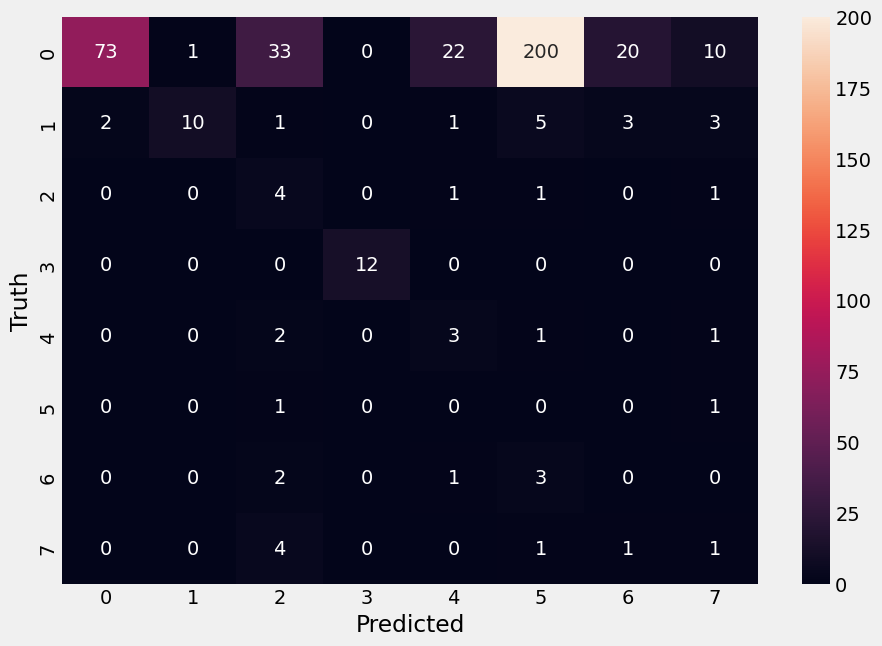

In [87]:
cm_gnaive = confusion_matrix(y_test , y_pred_gnaive)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_gnaive, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
print(accuracy_score(y_test , y_pred_gnaive))
print(accuracy_score(y_train , y_pred_gnaive_train))

0.24235294117647058
0.28549019607843135


# 8. XG Boost Classifier


In [89]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
results_XGB = cross_val_score(model_XGB, x_train, y_train, cv=kfold)
print(results_XGB.mean())

0.9191990649606299


In [90]:
model_XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [91]:
y_pred_XGB = model_XGB.predict(x_test)
y_pred_XGB_train = model_XGB.predict(x_train)

Text(50.58333333333333, 0.5, 'Truth')

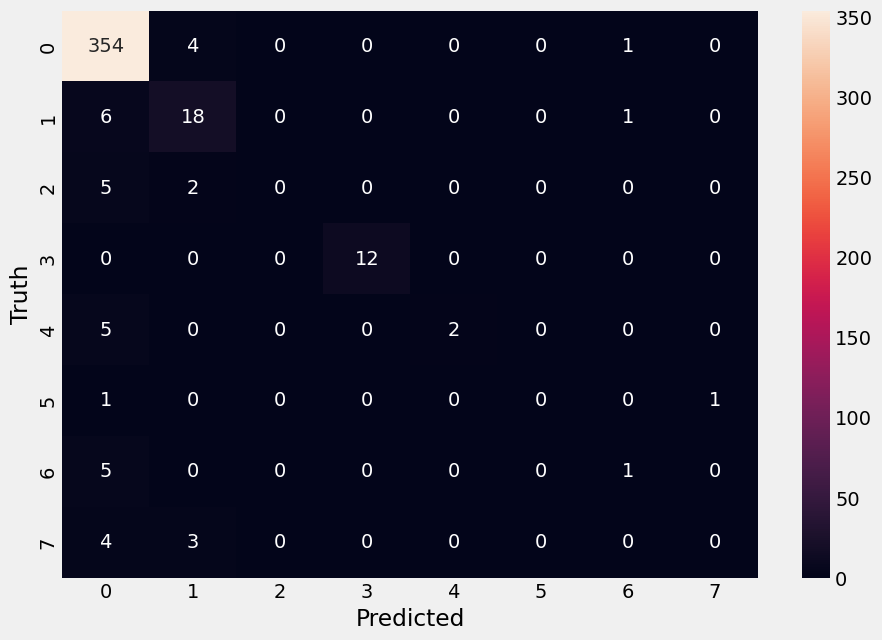

In [92]:
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_XGB, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
print(accuracy_score(y_test , y_pred_XGB))
print(accuracy_score(y_train, y_pred_XGB_train))

0.9105882352941177
1.0


In [94]:
XGB_acc = cross_val_score(estimator =model_XGB,X =x_train, y= y_train, cv= 10)
print(XGB_acc.mean())

0.9208046259842521


In [105]:
import pickle
xgb='model_XGB.pkl'

In [113]:
##serialize 
with open('model_XGB_pickle','wb')as f:
    pickle.dump(model_XGB,f)

In [114]:
##unserialize 
with open('model_XGB_pickle','rb')as f:
    np = pickle.load(f)

In [127]:
np.predict(x_test)

array([0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [129]:
np.predict(x_train)

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [118]:
import joblib
##serialize 
with open('model_XGB_joblib','wb')as f:
    joblib.dump(model_XGB,f)

In [119]:
mj=joblib.load('model_XGB_joblib')

In [123]:
mj.predict(x_train)

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [124]:
mj.predict(x_test)

array([0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [130]:
pip install streamlit

In [133]:
import streamlit as st

In [134]:
st.title("p235new")

2023-05-16 12:55:59.778 
  command:

    streamlit run C:\Users\Tannu\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [137]:
st.selectbox(X<Y)

ValueError: operands could not be broadcast together with shapes (1700,122) (1700,) 

In [138]:
st.sidebar()

TypeError: 'DeltaGenerator' object is not callable

In [140]:
st.text(X)

DeltaGenerator()

In [141]:
st.header(X)

DeltaGenerator()

In [142]:
st.subheader(X)

DeltaGenerator()

In [143]:
st.line_chart()

DeltaGenerator()

In [144]:
st.area_chart()

DeltaGenerator()

In [145]:
st.pyplot()

DeltaGenerator()

In [154]:
import pandas as pd
import streamlit as st 
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

st.title('Model Deployment: XGB')

st.sidebar.header('User Input Parameters')

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [156]:

def user_input_features():
    gender = st.sidebar.selectbox('SEX',('1','0'))
    age = st.sidebar.selectbox('AGE',('1','0'))
    data = {'gender':SEX,
            'age':age
           }
    features = pd.DataFrame(data,index = [0])
    return features 
    

In [153]:
pip install packages("shinythemes")

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "install.packages(shinythemes)"



In [155]:
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
